In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
sns.set_style("darkgrid")
from pandas.plotting import scatter_matrix
%matplotlib inline
from matplotlib.pyplot import savefig

#### Preprocessing the Data and encoding the data and scaling the data

In [2]:
dataset=pd.read_csv("data.csv")

dataset.drop(["Unnamed: 32","id"],axis=1,inplace=True)

dataset['diagnosis'] = dataset['diagnosis'].map({'M':1,'B':0})

X=dataset.drop("diagnosis",axis=1)
y=dataset.diagnosis.values

## encoding the categorical labels 

encoder=LabelEncoder()
y=encoder.fit_transform(y)
#malignant=1 ,benign =0

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

## Scaling the Data for proper Results

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

### Kernel SVM

In [3]:
svc=SVC(kernel="rbf",random_state=0)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

cm=confusion_matrix(y_test,y_pred)

cr=classification_report(y_test,y_pred)

print("THE DETAILS FOR KERNEL SVM \n\n")
print(cm,"\n\n",cr)

THE DETAILS FOR KERNEL SVM 


[[88  2]
 [ 3 50]] 

               precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143

THE DETAILS FOR KERNEL SVM 


[[88  2]
 [ 3 50]] 

               precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



### Decision Tree

In [4]:
tree=DecisionTreeClassifier(random_state=0)

tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

cm2=confusion_matrix(y_test,y_pred)

cr2=classification_report(y_test,y_pred)

print("THE DETAILS FOR Decision Tree Classifier \n\n")

print(cm2,"\n\n",cr2)

THE DETAILS FOR Decision Tree Classifier 


[[79 11]
 [ 2 51]] 

               precision    recall  f1-score   support

           0       0.98      0.88      0.92        90
           1       0.82      0.96      0.89        53

    accuracy                           0.91       143
   macro avg       0.90      0.92      0.91       143
weighted avg       0.92      0.91      0.91       143

THE DETAILS FOR Decision Tree Classifier 


[[79 11]
 [ 2 51]] 

               precision    recall  f1-score   support

           0       0.98      0.88      0.92        90
           1       0.82      0.96      0.89        53

    accuracy                           0.91       143
   macro avg       0.90      0.92      0.91       143
weighted avg       0.92      0.91      0.91       143



### Neural Networks

In [5]:
neural=Perceptron(random_state=0,max_iter=100,tol=0.001)

neural.fit(X_train,y_train)

y_pred=neural.predict(X_test)

cm3=confusion_matrix(y_test,y_pred)

print("THE DETAILS FOR NeuralNetworks \n\n")

cr3=classification_report(y_test,y_pred)
print(cm3,"\n\n",cr3)

THE DETAILS FOR NeuralNetworks 


[[88  2]
 [ 3 50]] 

               precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143

THE DETAILS FOR NeuralNetworks 


[[88  2]
 [ 3 50]] 

               precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



### MultiLayer Neural Networks

In [6]:
MLP=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=0)

MLP.fit(X_train,y_train)

y_pred=MLP.predict(X_test)

cm4=confusion_matrix(y_test,y_pred)
cr4=classification_report(y_test,y_pred)

print("THE DETAILS FOR MultiLayer Neural Networks\n\n")

print(cm4,"\n\n",cr4)

THE DETAILS FOR MultiLayer Neural Networks


[[81  9]
 [ 3 50]] 

               precision    recall  f1-score   support

           0       0.96      0.90      0.93        90
           1       0.85      0.94      0.89        53

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143

THE DETAILS FOR MultiLayer Neural Networks


[[81  9]
 [ 3 50]] 

               precision    recall  f1-score   support

           0       0.96      0.90      0.93        90
           1       0.85      0.94      0.89        53

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143



### Naive Bayes Classifier

In [7]:
gauss= GaussianNB()

gauss.fit(X_train,y_train)
y_pred=gauss.predict(X_test)

cm5=confusion_matrix(y_test,y_pred)

cr5=classification_report(y_test,y_pred)
print("THE DETAILS FOR NaiveBayes Classifier \n\n")
print(cm5,"\n\n",cr5)

THE DETAILS FOR NaiveBayes Classifier 


[[86  4]
 [ 5 48]] 

               precision    recall  f1-score   support

           0       0.95      0.96      0.95        90
           1       0.92      0.91      0.91        53

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

THE DETAILS FOR NaiveBayes Classifier 


[[86  4]
 [ 5 48]] 

               precision    recall  f1-score   support

           0       0.95      0.96      0.95        90
           1       0.92      0.91      0.91        53

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



### Logistic Regression

In [8]:
logreg=LogisticRegression(random_state=0)

logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

cm6=confusion_matrix(y_test,y_pred)

cr6=classification_report(y_test,y_pred)

print("THE DETAILS FOR Logistic Regression \n\n")
print(cm6,"\n\n",cr6)

THE DETAILS FOR Logistic Regression 


[[86  4]
 [ 2 51]] 

               precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

THE DETAILS FOR Logistic Regression 


[[86  4]
 [ 2 51]] 

               precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Visualisation

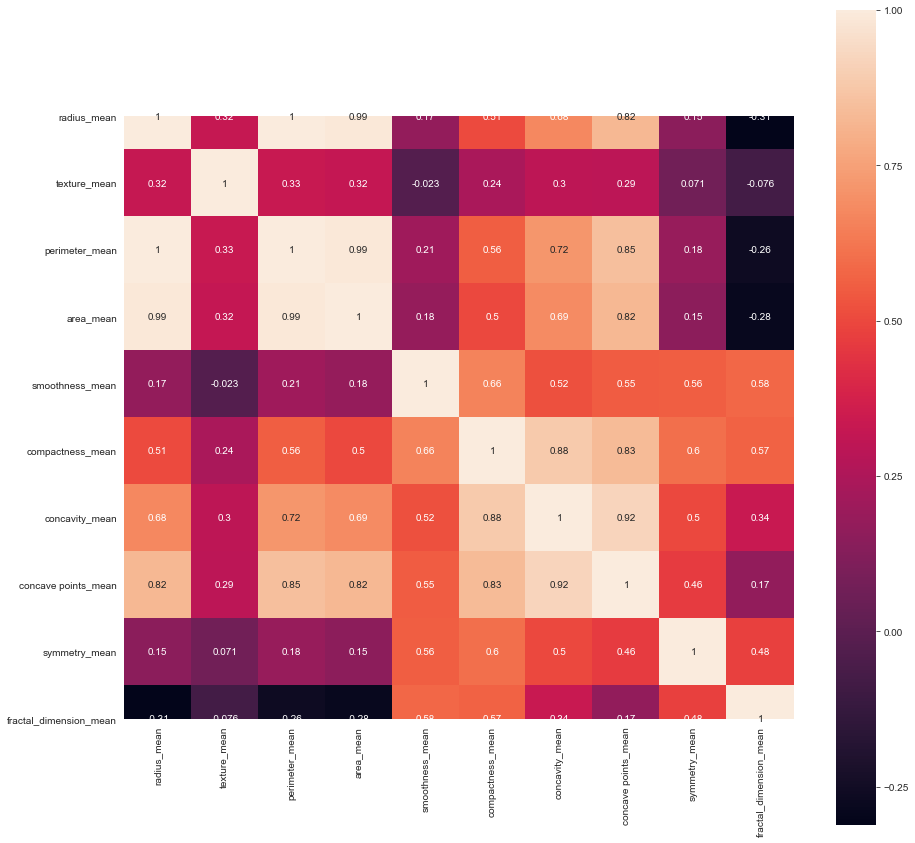

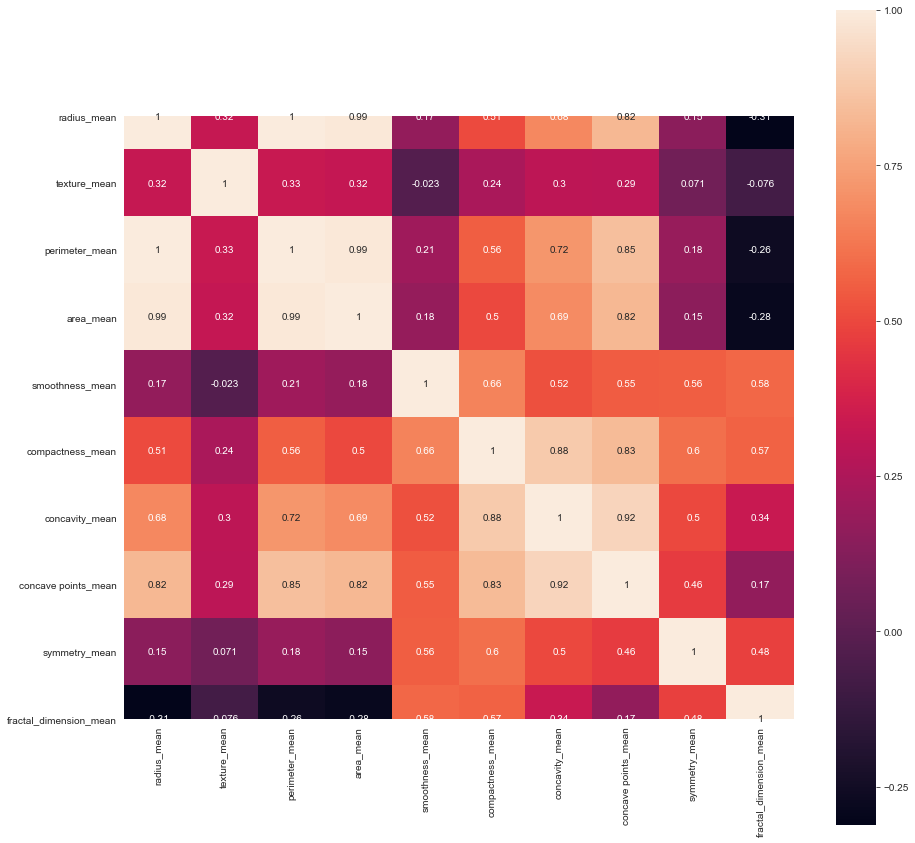

In [9]:
features_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
plt.figure(figsize=(15,15))
heat = sns.heatmap(dataset[features_mean].corr(), vmax=1, square=True, annot=True)

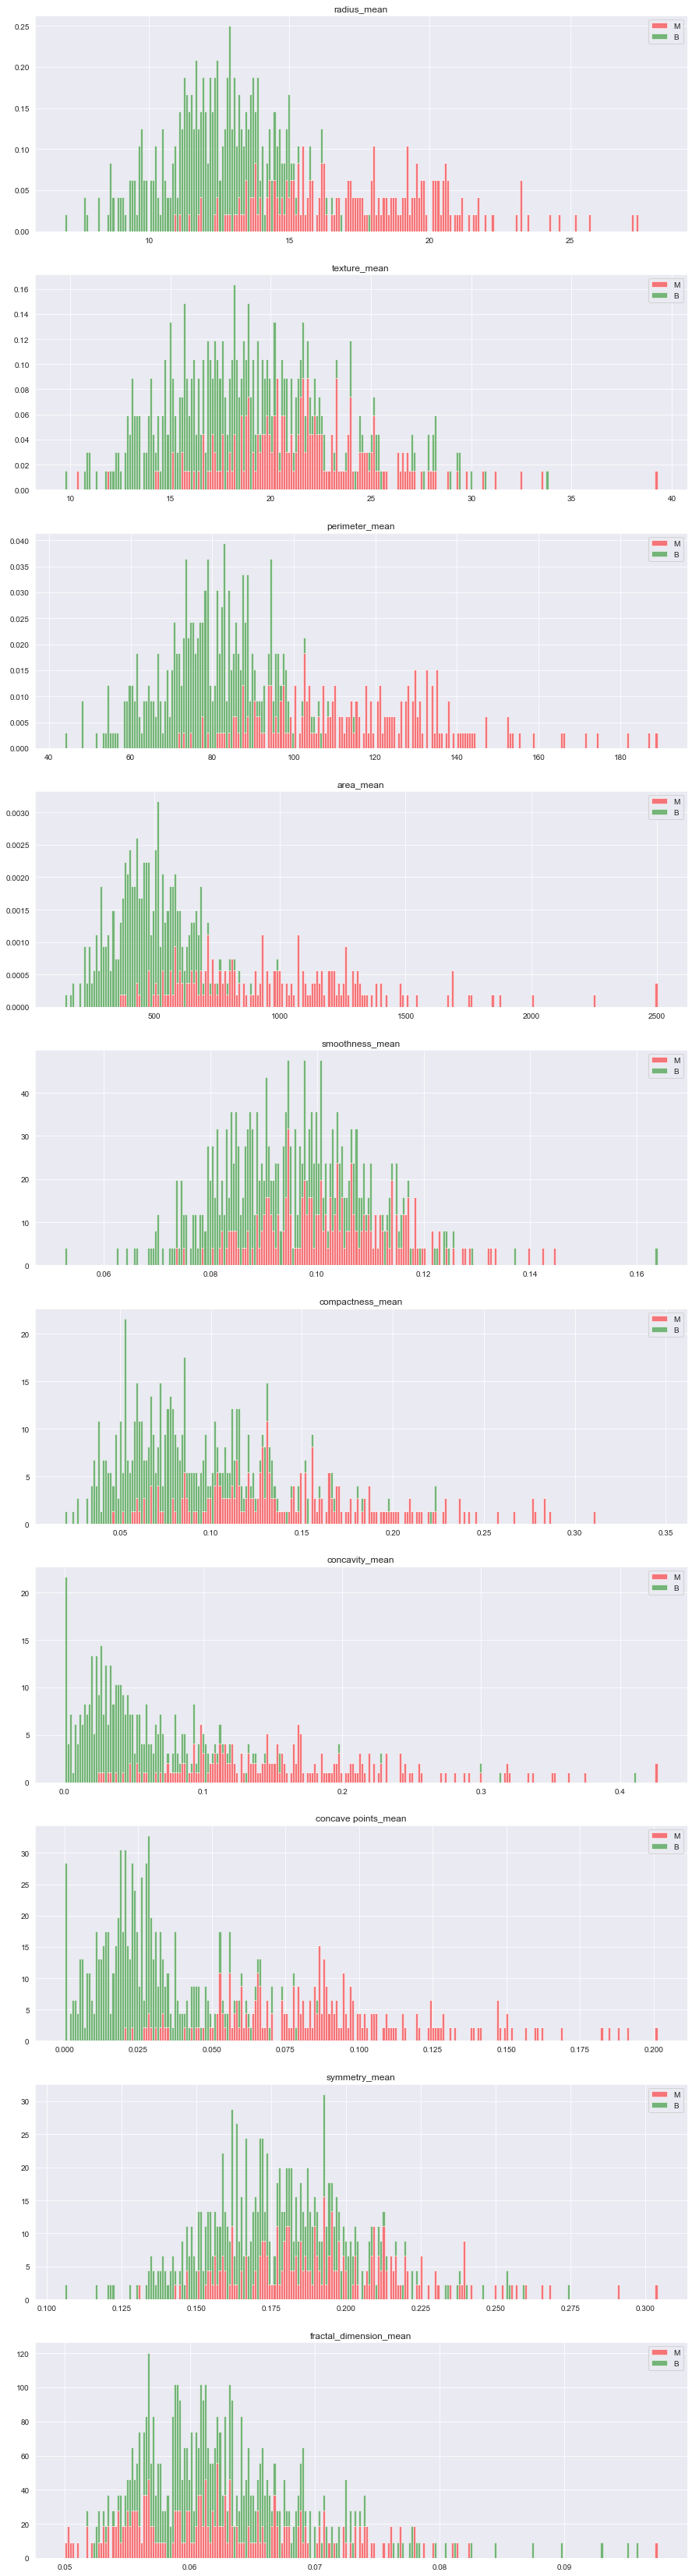

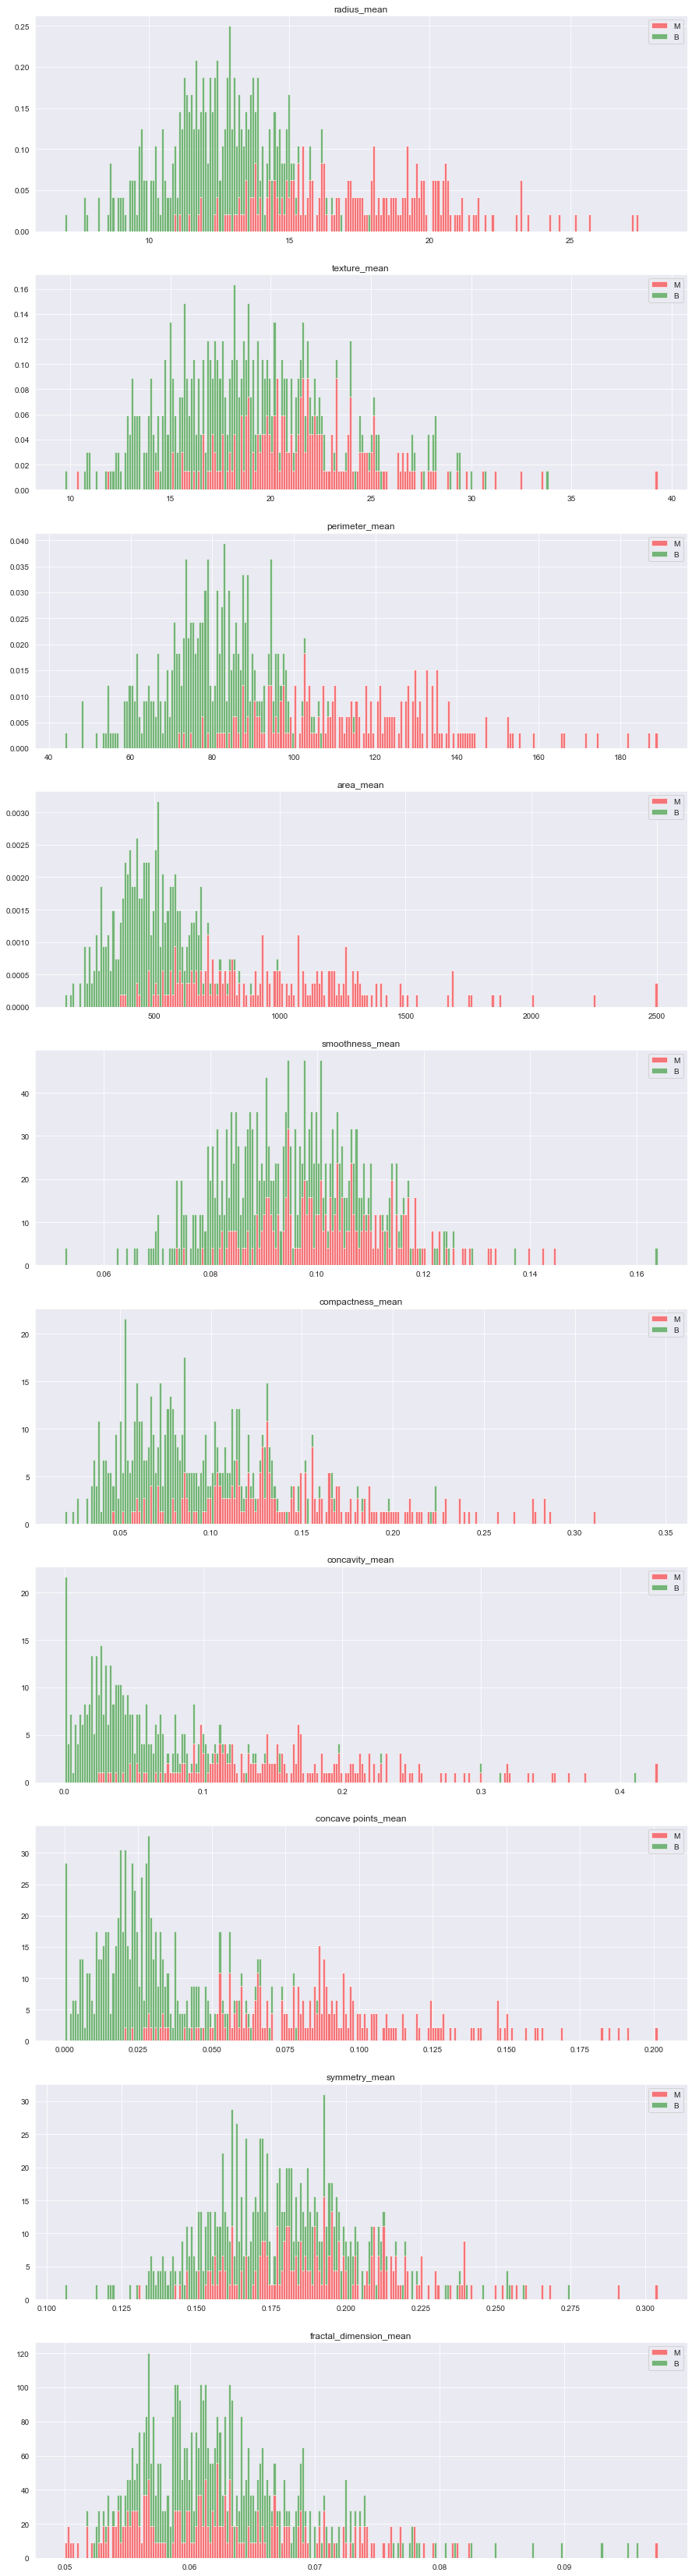

In [10]:
dataMalignant=dataset[dataset['diagnosis'] ==1]
dataBenign=dataset[dataset['diagnosis'] ==0]

#Plotting these features as a histogram
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(15,60))
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(dataset[features_mean[idx]]) - min(dataset[features_mean[idx]]))/250
    ax.hist([dataMalignant[features_mean[idx]],dataBenign[features_mean[idx]]], bins=np.arange(min(dataset[features_mean[idx]]), max(dataset[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

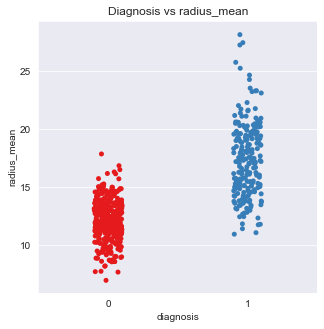

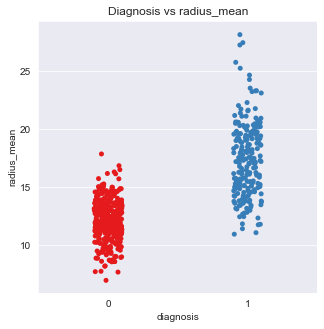

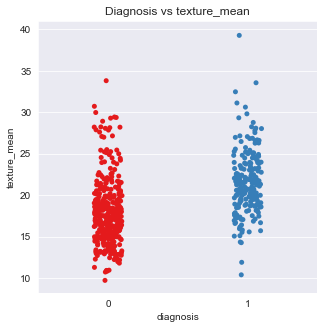

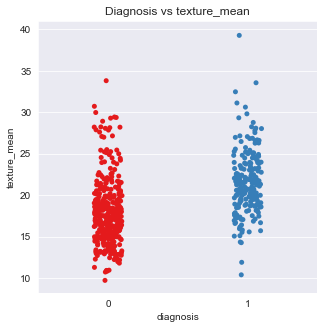

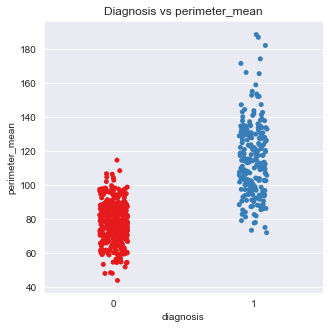

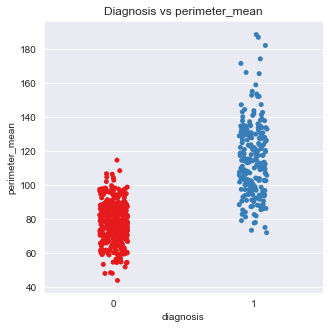

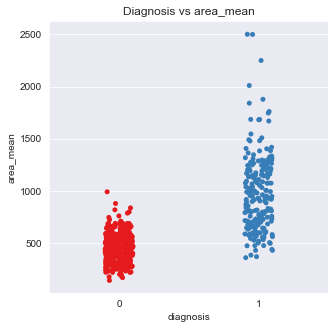

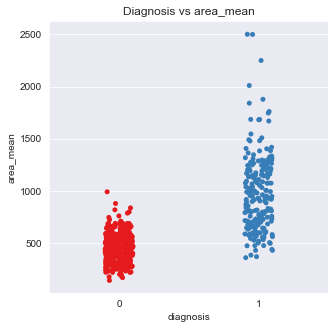

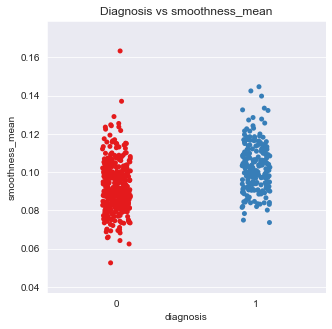

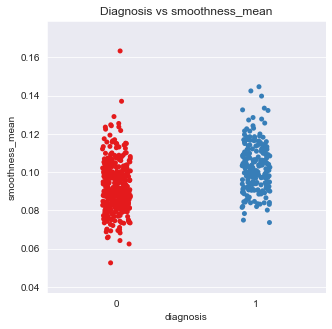

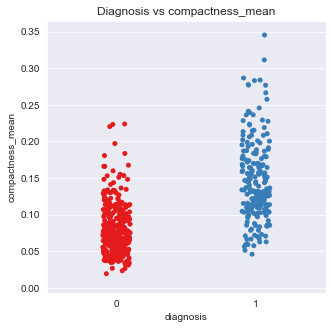

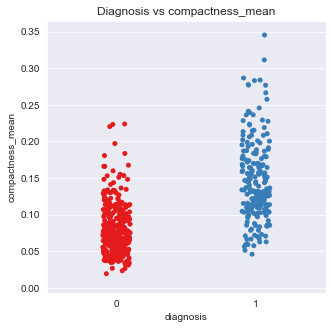

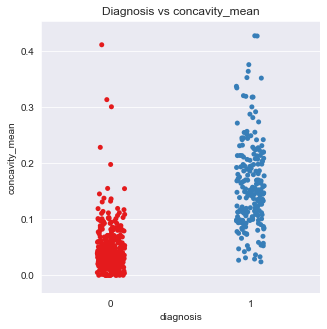

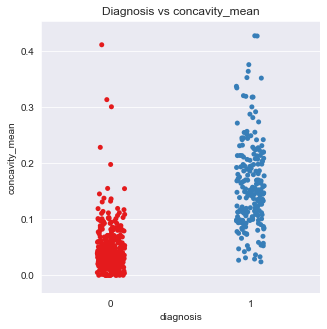

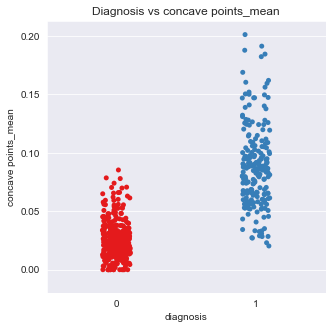

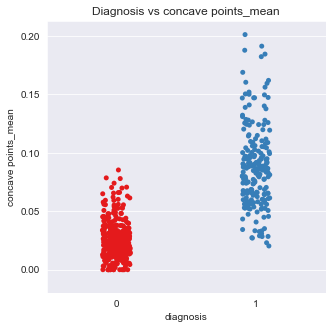

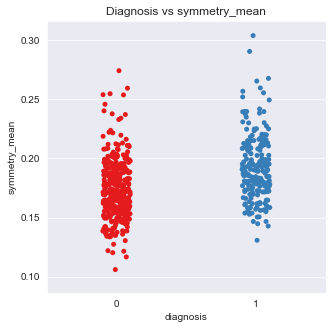

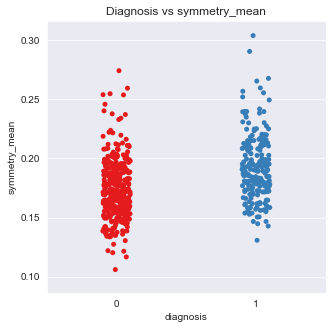

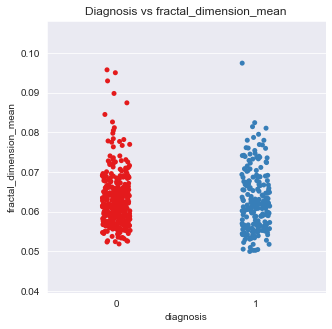

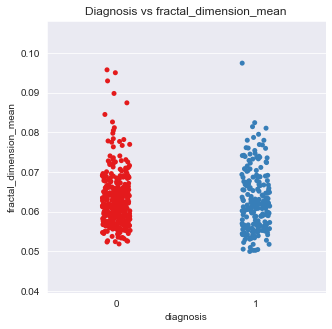

In [11]:
data_drop = dataset.drop('diagnosis',axis=1)
data_drop = data_drop[features_mean]
for index,columns in enumerate(data_drop):
    plt.figure(index)
    plt.figure(figsize=(5,5))
    plt.tight_layout()
    sns.stripplot(x='diagnosis', y= columns, data= dataset, jitter=True, palette = 'Set1');
    plt.title('Diagnosis vs ' + str(columns))

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

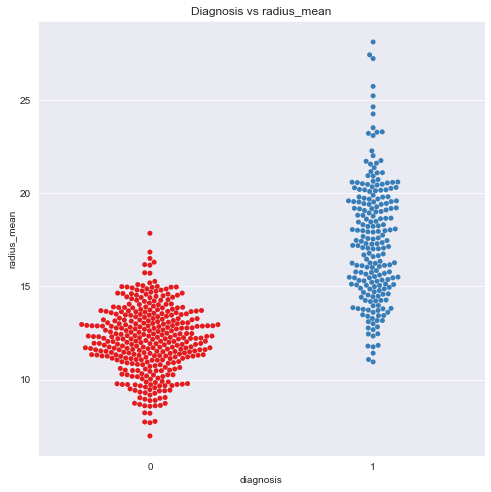

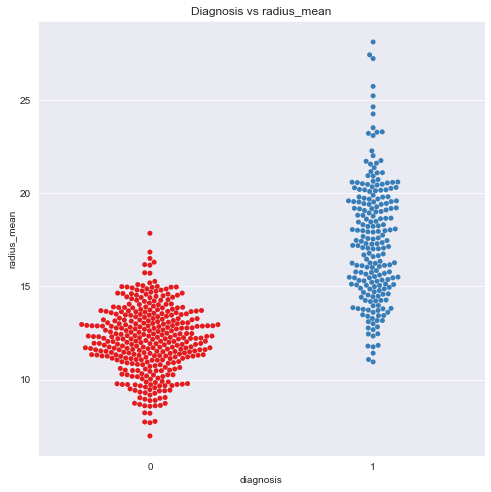

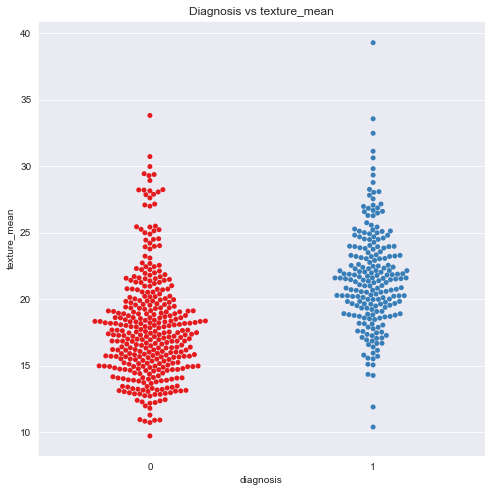

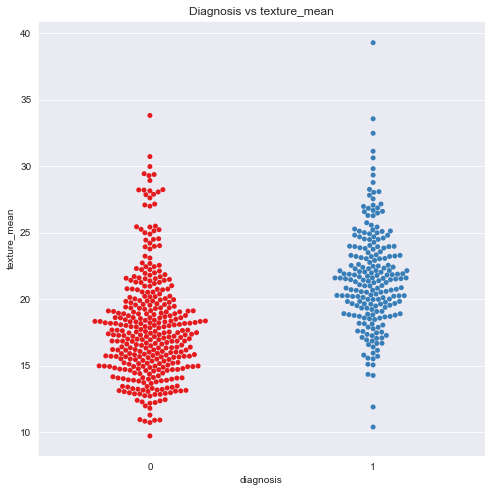

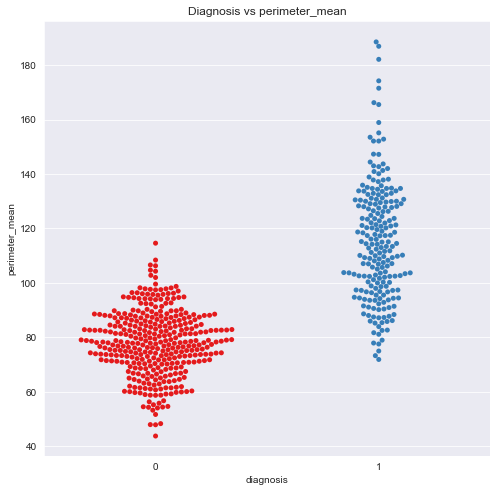

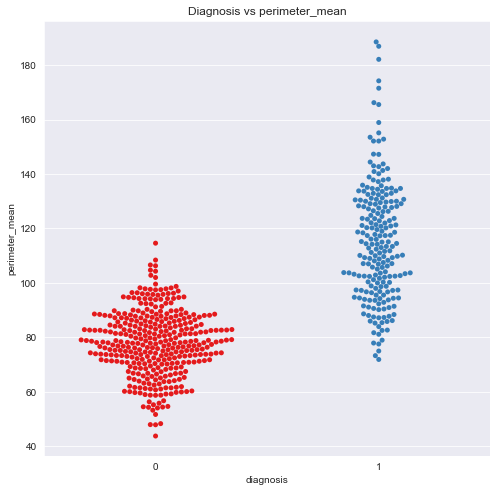

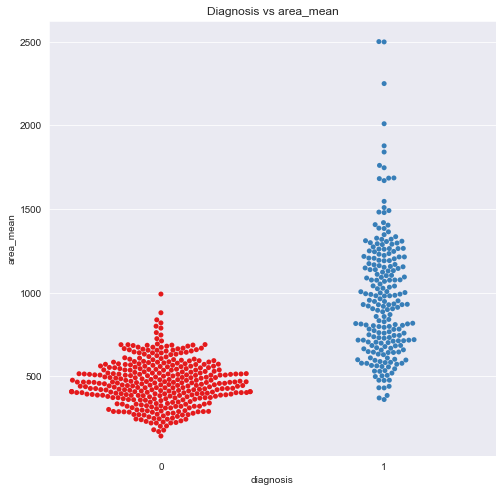

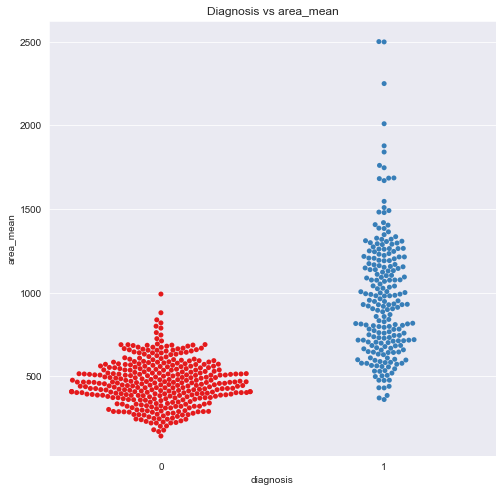

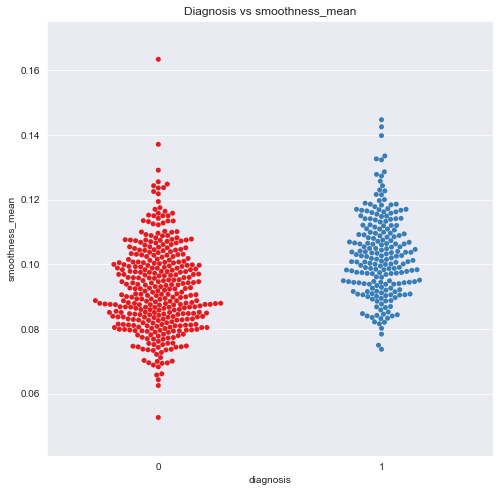

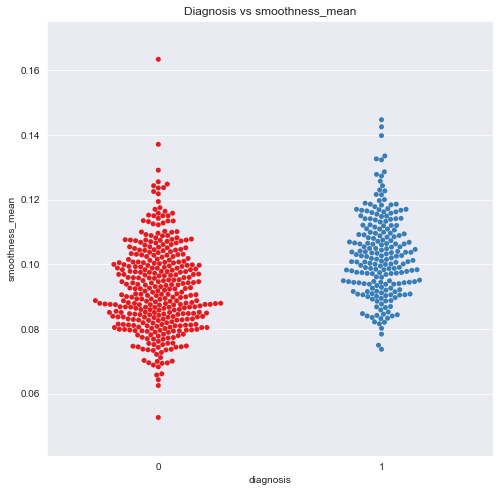

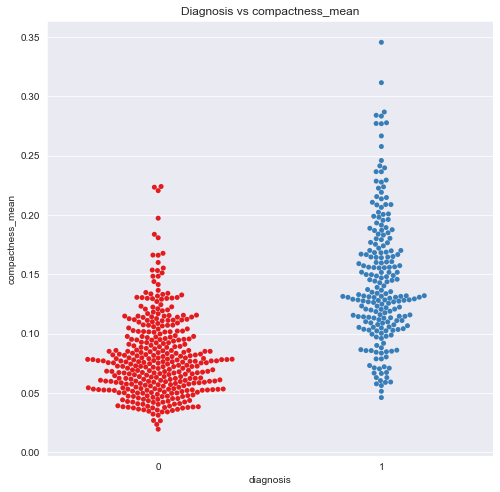

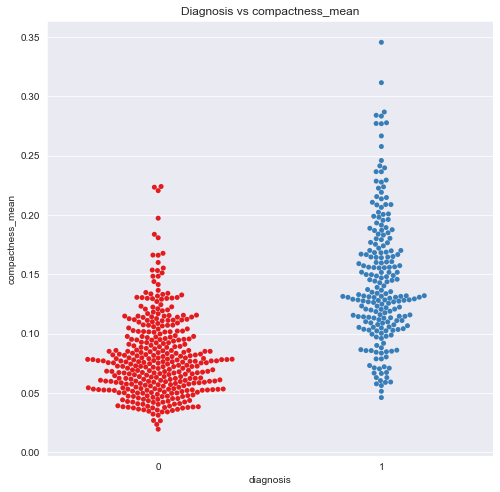

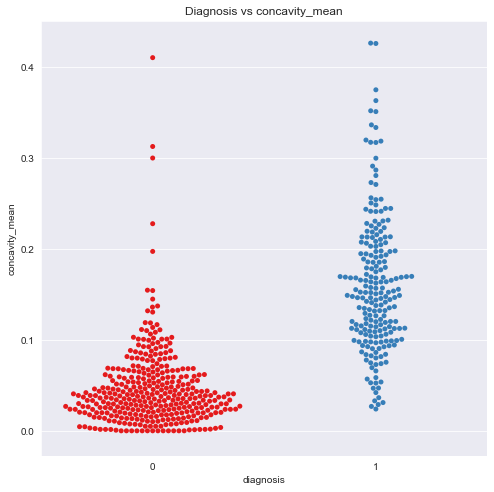

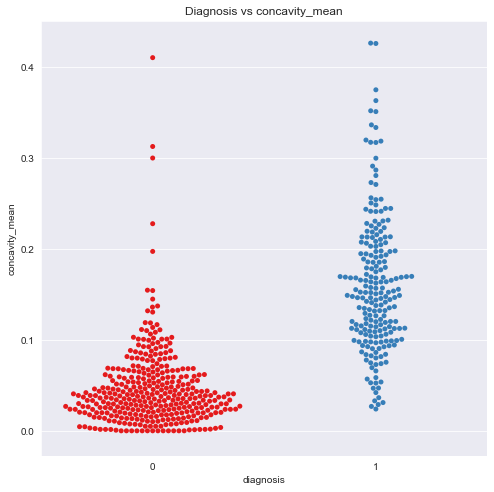

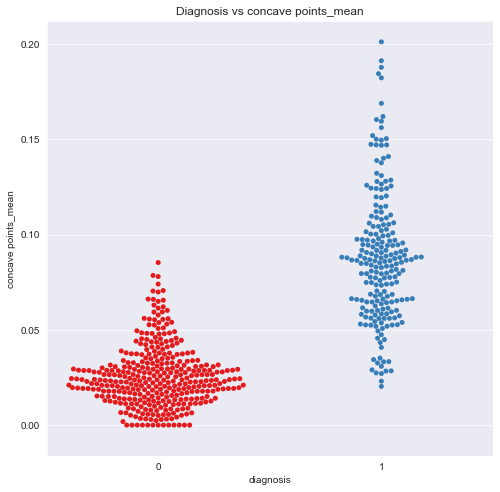

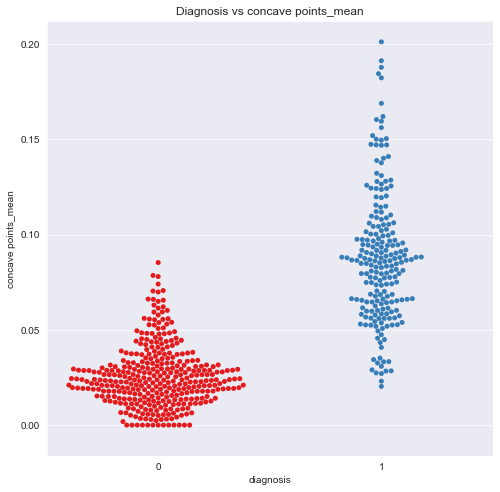

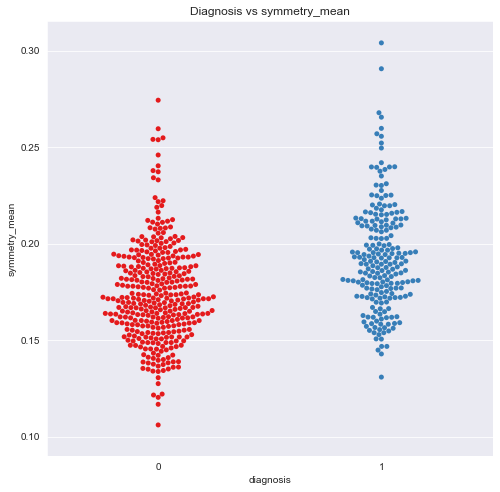

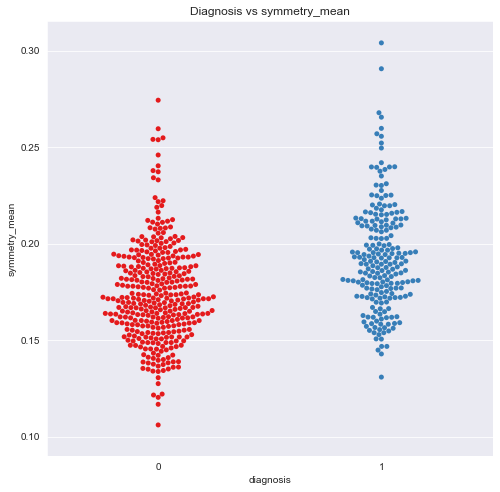

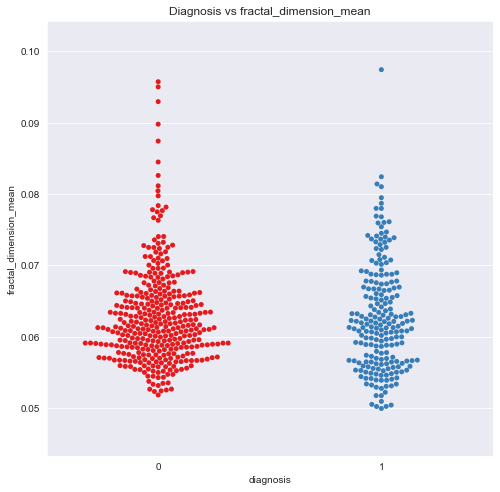

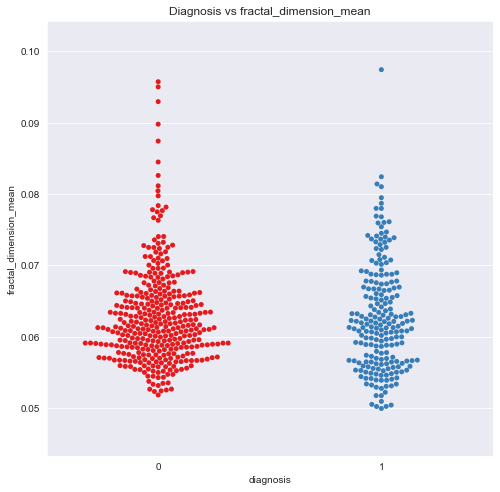

In [12]:
for index,columns in enumerate(data_drop):
    plt.figure(index)
    plt.figure(figsize=(8,8))
    sns.swarmplot(x='diagnosis', y= columns, data= dataset, palette = 'Set1');
    plt.title('Diagnosis vs ' + str(columns))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1675: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1675: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

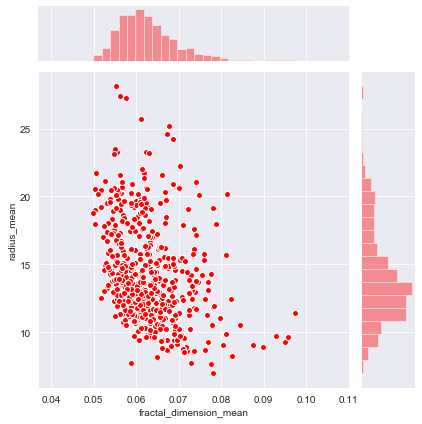

<Figure size 1080x1080 with 0 Axes>

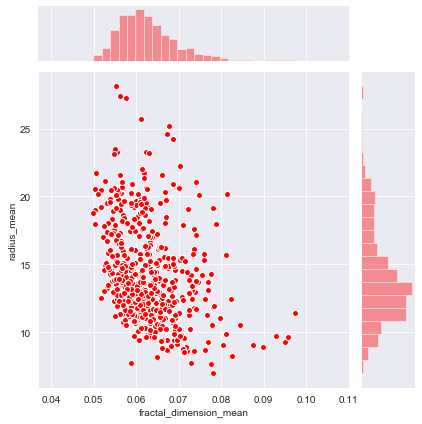

<Figure size 1080x1080 with 0 Axes>

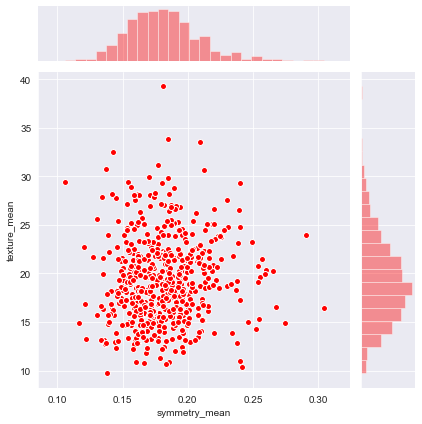

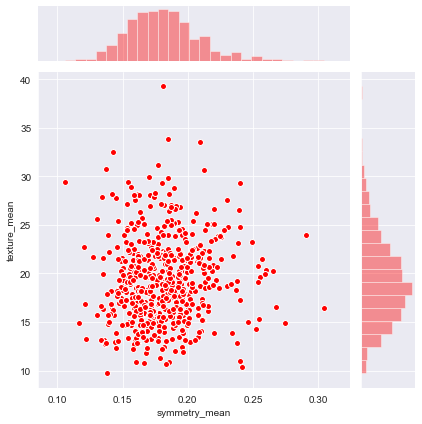

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

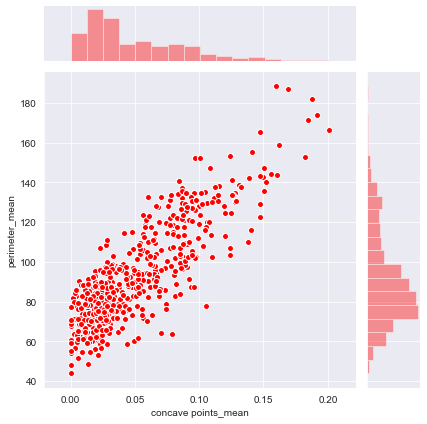

<Figure size 1080x1080 with 0 Axes>

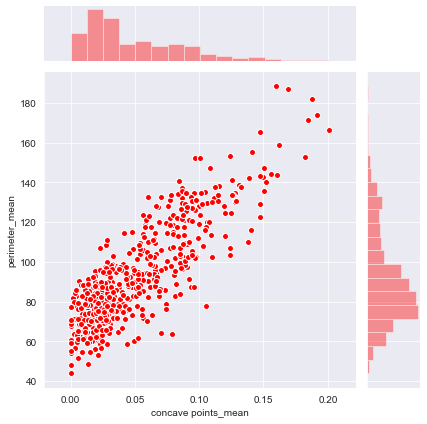

<Figure size 1080x1080 with 0 Axes>

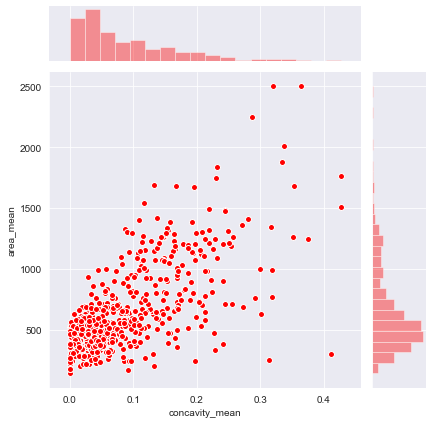

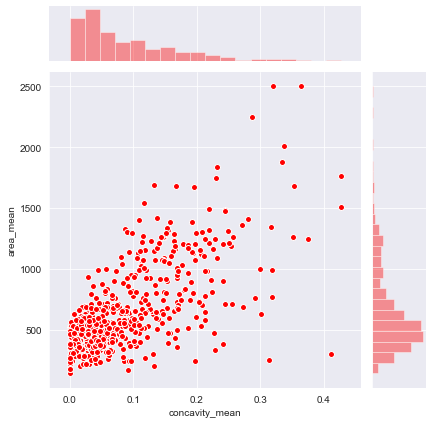

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

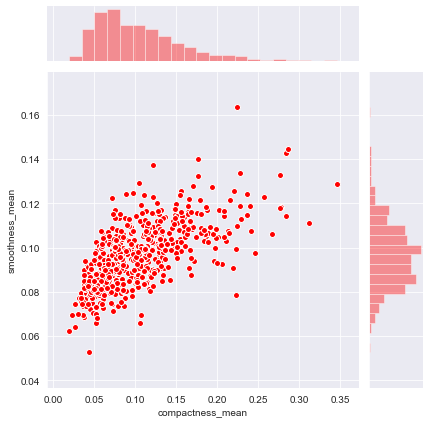

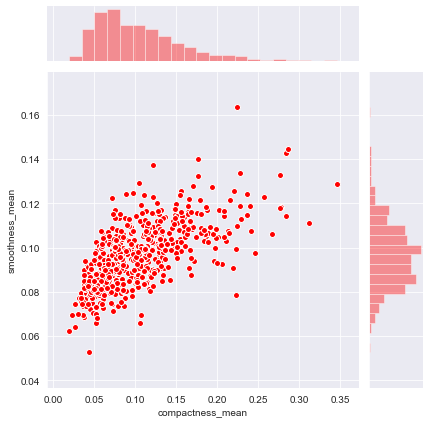

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

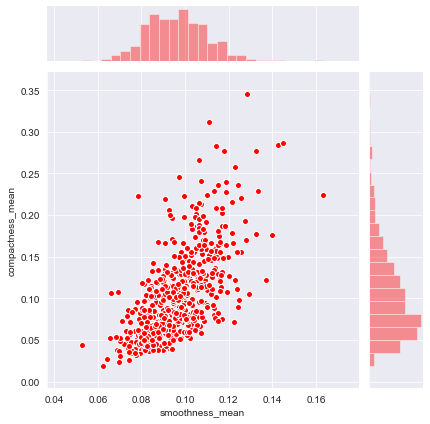

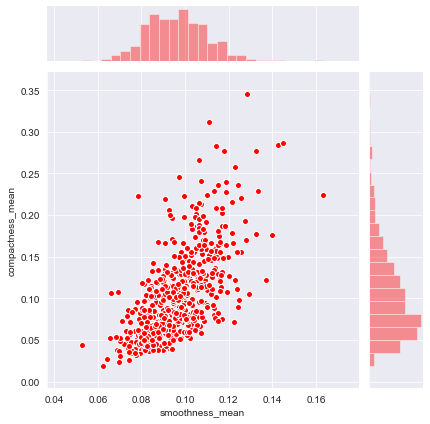

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

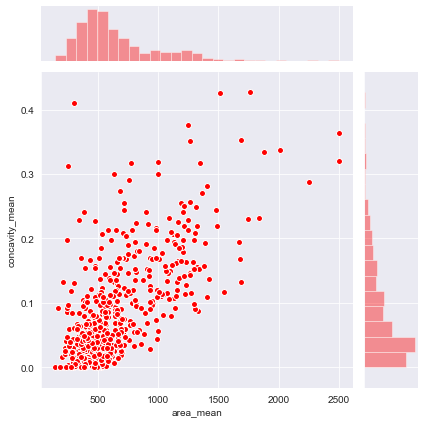

<Figure size 1080x1080 with 0 Axes>

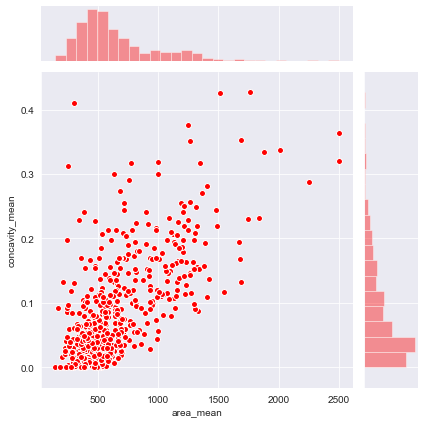

<Figure size 1080x1080 with 0 Axes>

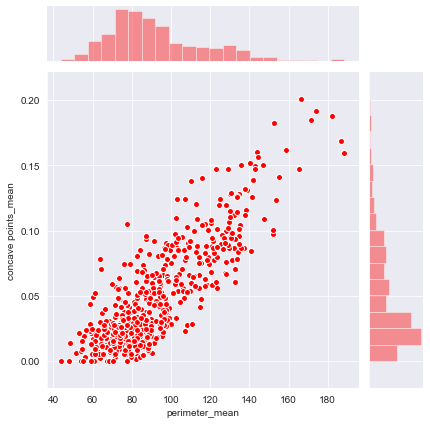

<Figure size 1080x1080 with 0 Axes>

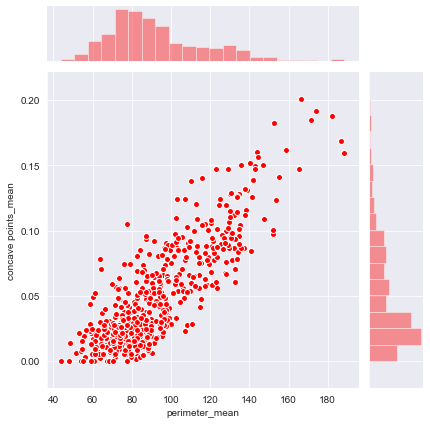

<Figure size 1080x1080 with 0 Axes>

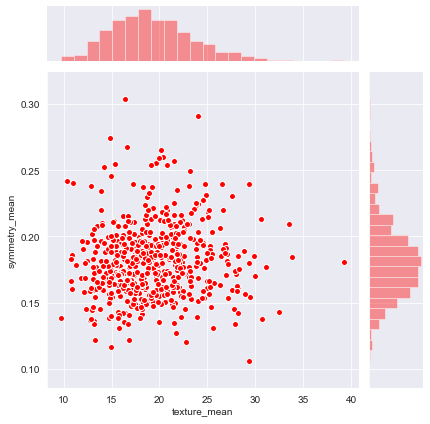

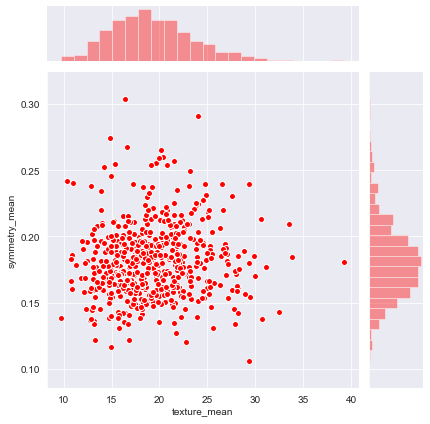

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

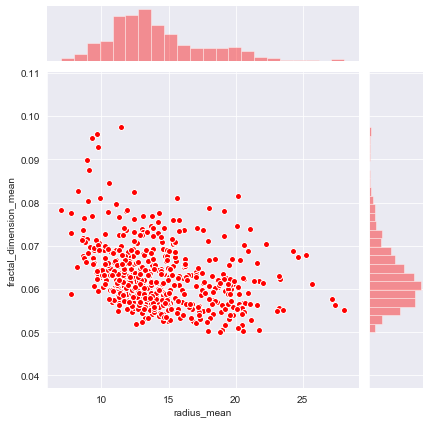

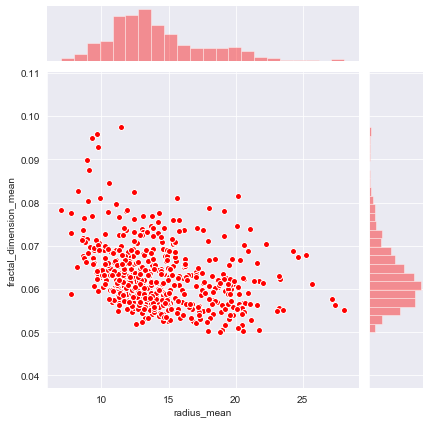

In [13]:
plt.close('all')
for index,columns in enumerate(data_drop):
    plt.figure(index)
    plt.figure(figsize=(15,15))
    sns.jointplot(x=data_drop[features_mean[len(features_mean)-index-1]], y= dataset[columns],  stat_func=None, color="red", edgecolor = 'w', height = 6);

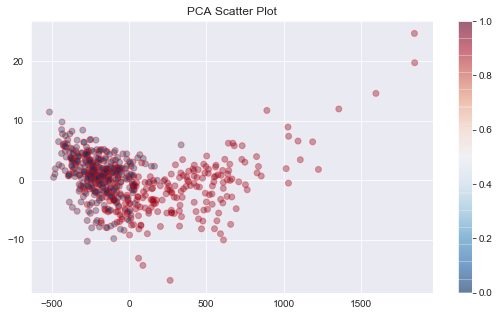

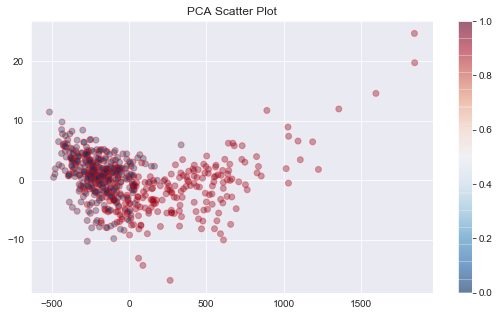

In [14]:
from sklearn.decomposition import PCA 
X_ = data_drop.values
pca = PCA(n_components=2) #Binary Classifier
pca = pca.fit_transform(X_)
plt.figure(figsize = (9,5))
plt.scatter(pca[:,0],pca[:,1], c = dataset['diagnosis'], cmap = "RdBu_r", edgecolor = "Red", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


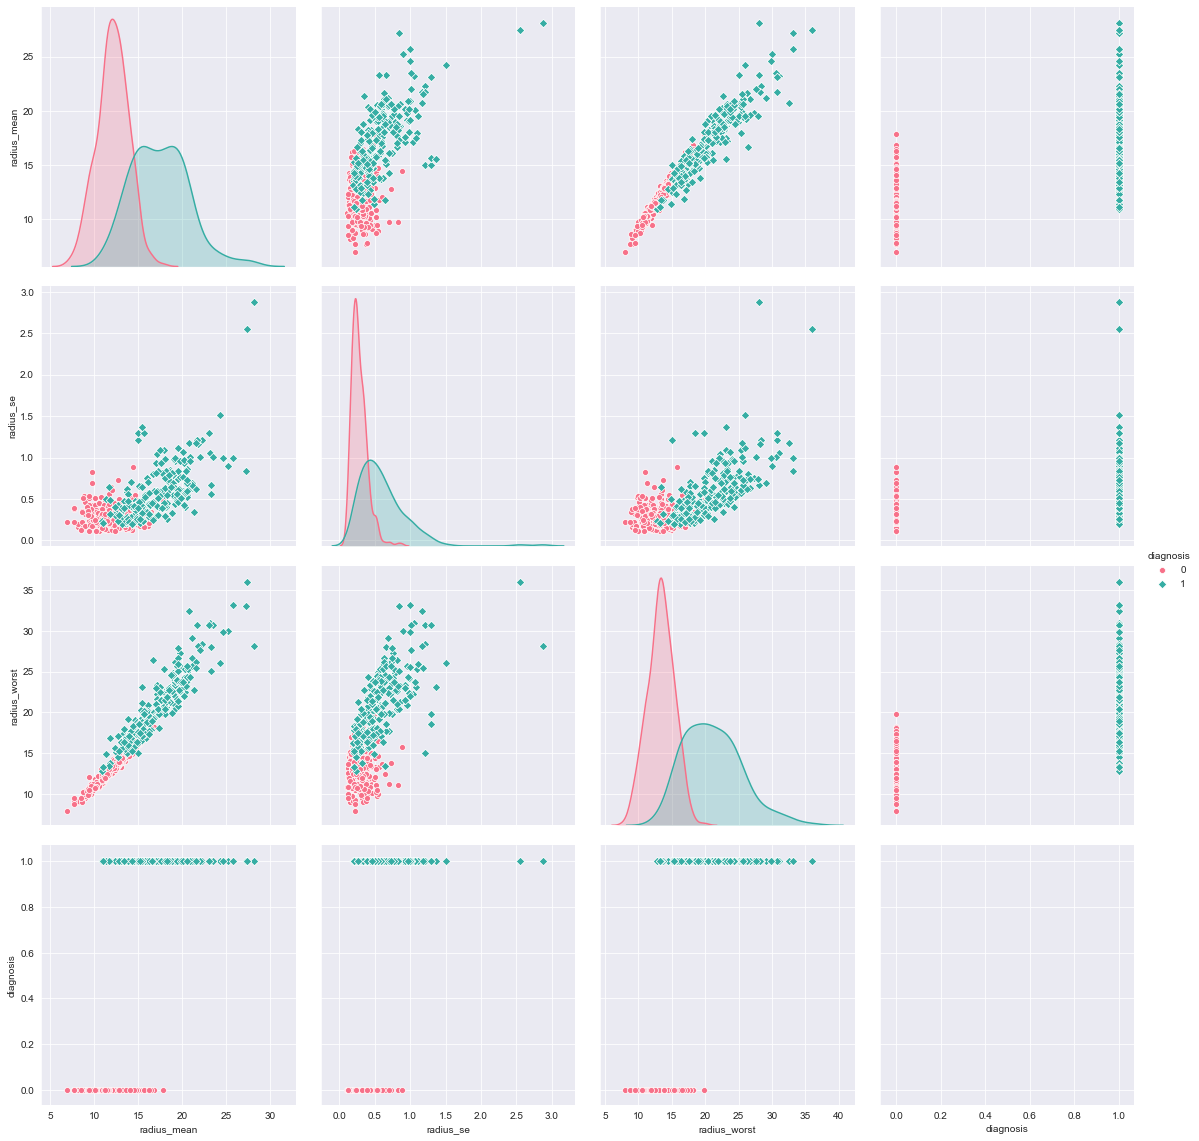

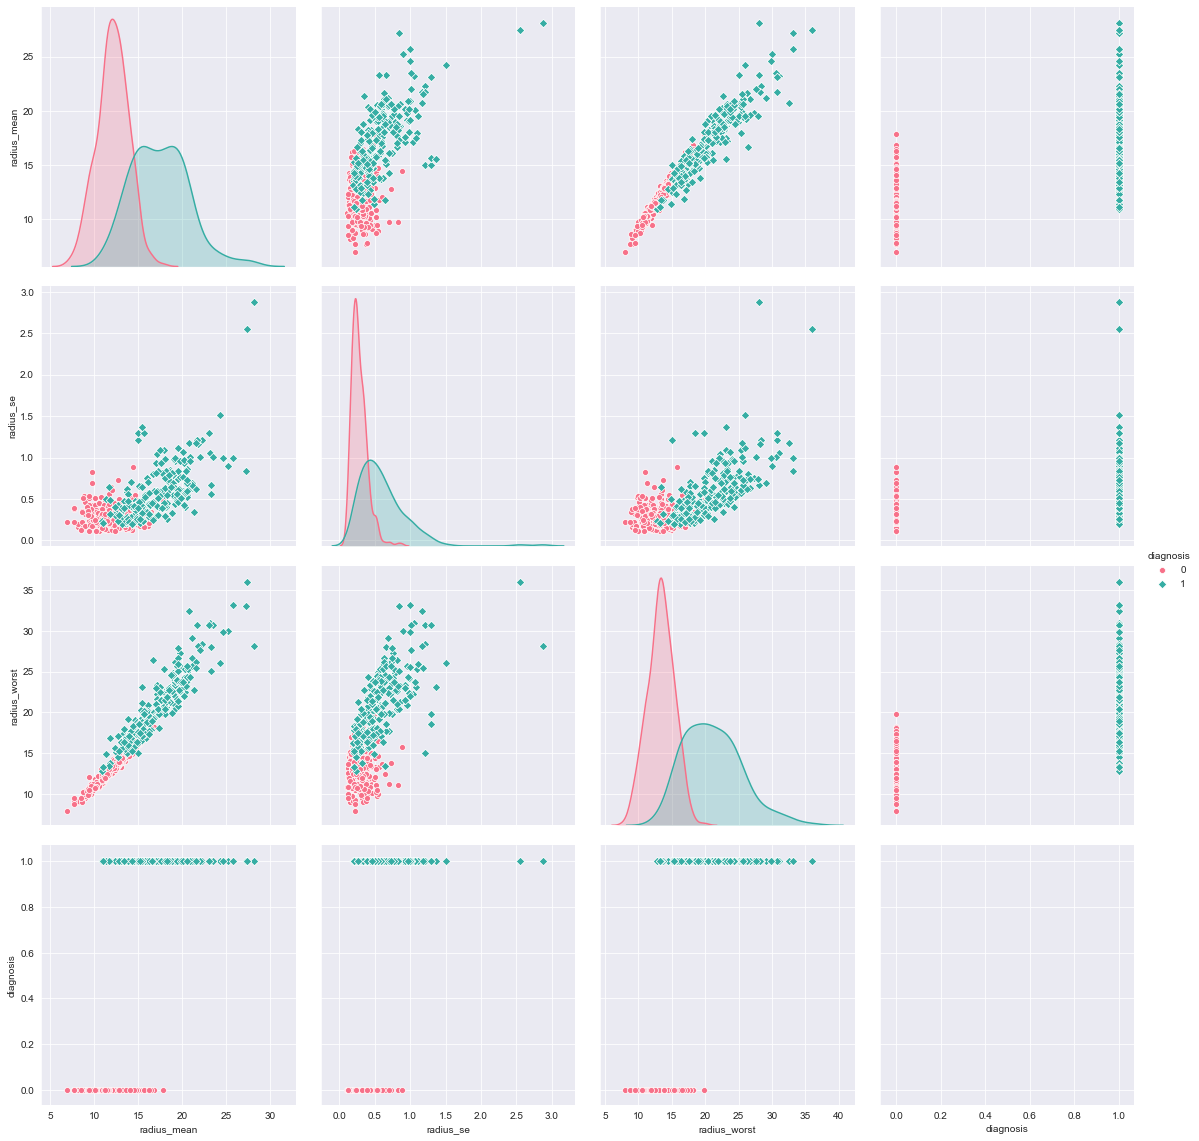

In [15]:
radius=dataset[['radius_mean','radius_se','radius_worst','diagnosis']]
sns.pairplot(radius,hue="diagnosis",palette="husl",markers=["o","D"], height=4)

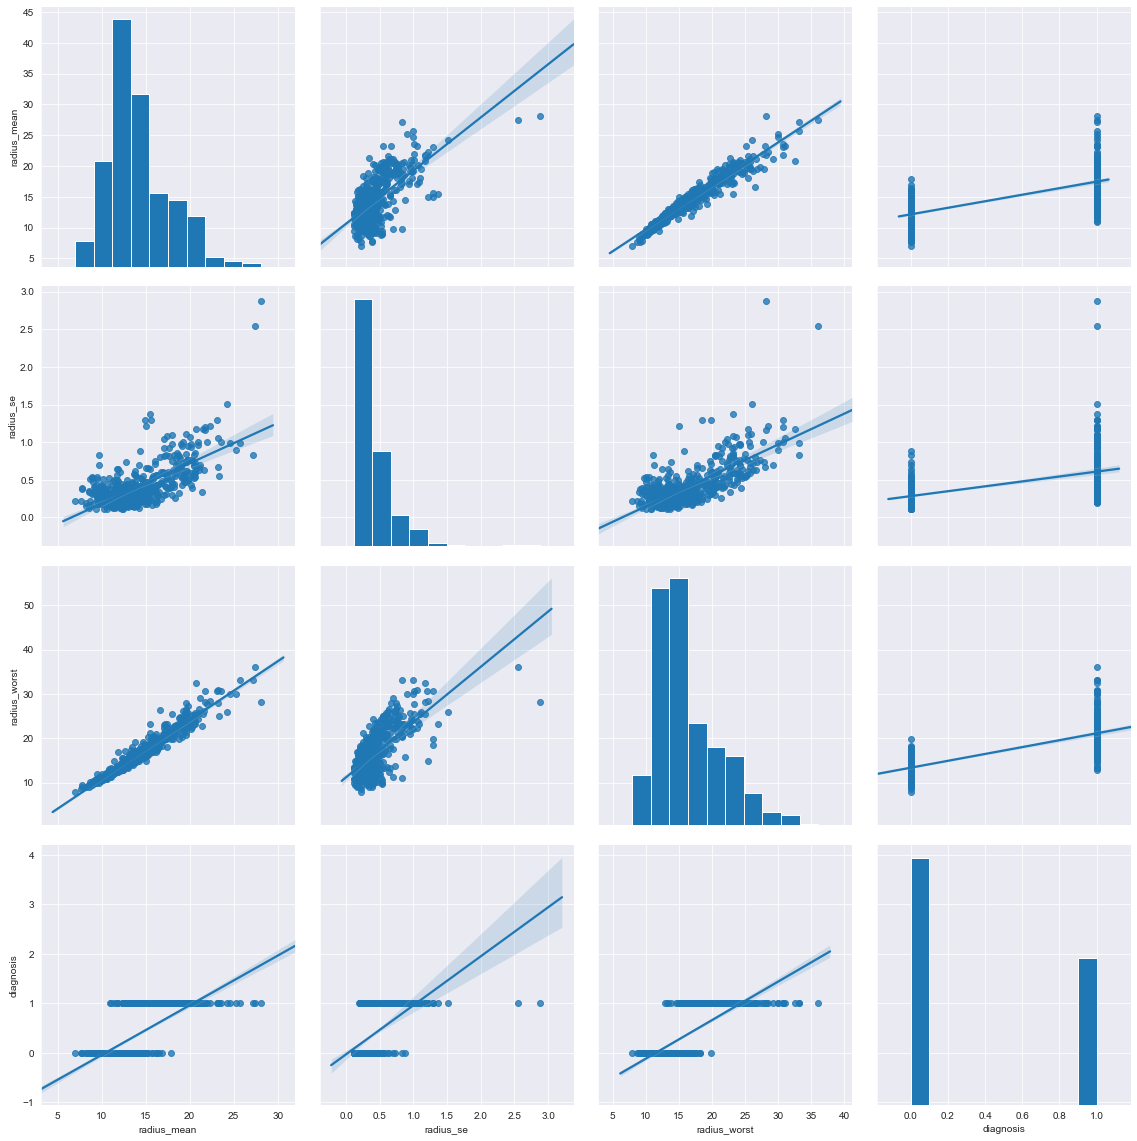

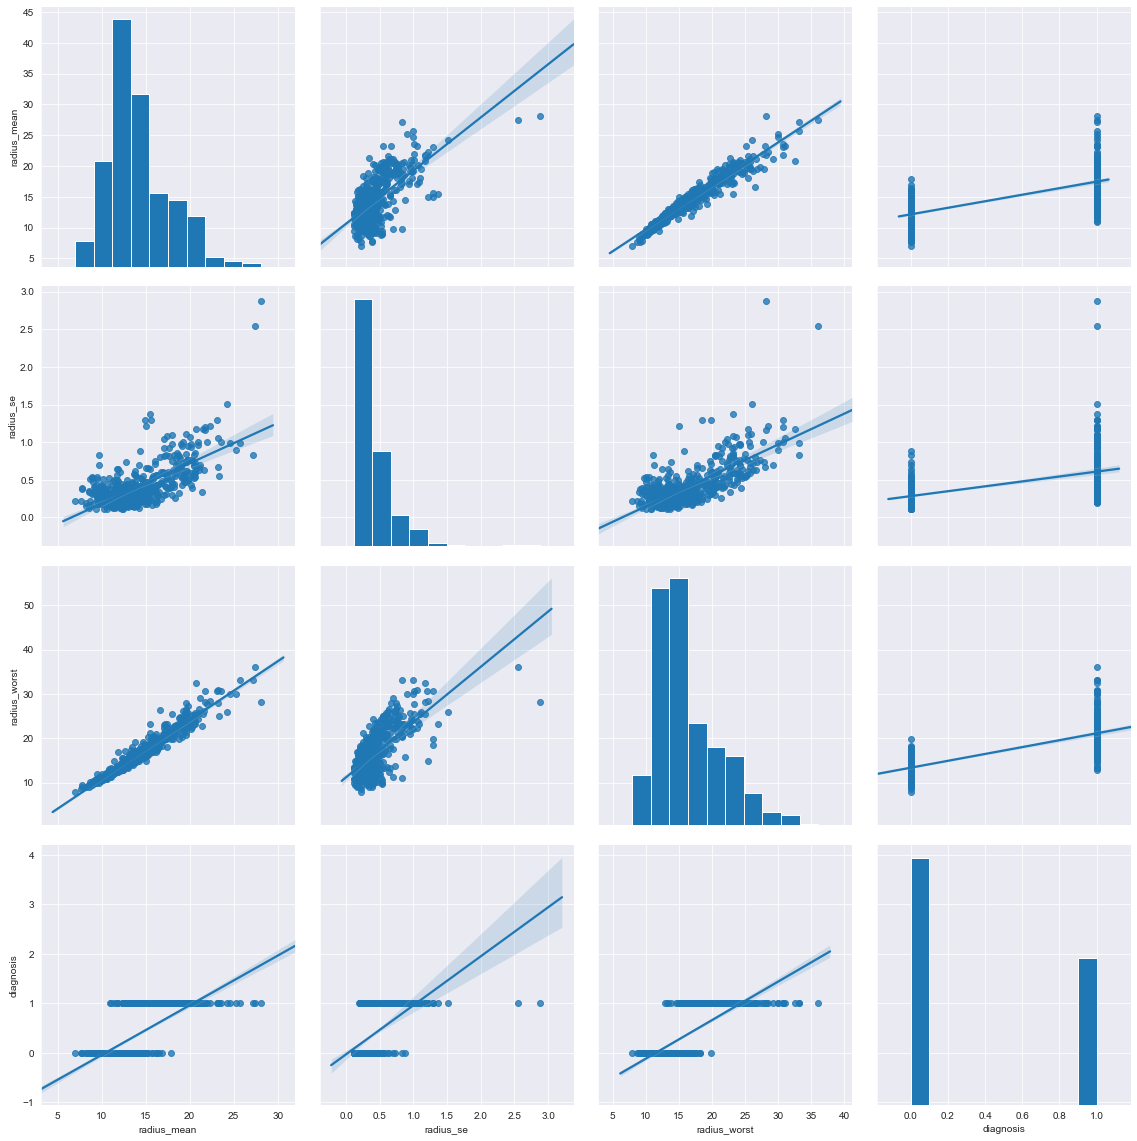

In [16]:
sns.pairplot(radius,kind="reg",height=4)

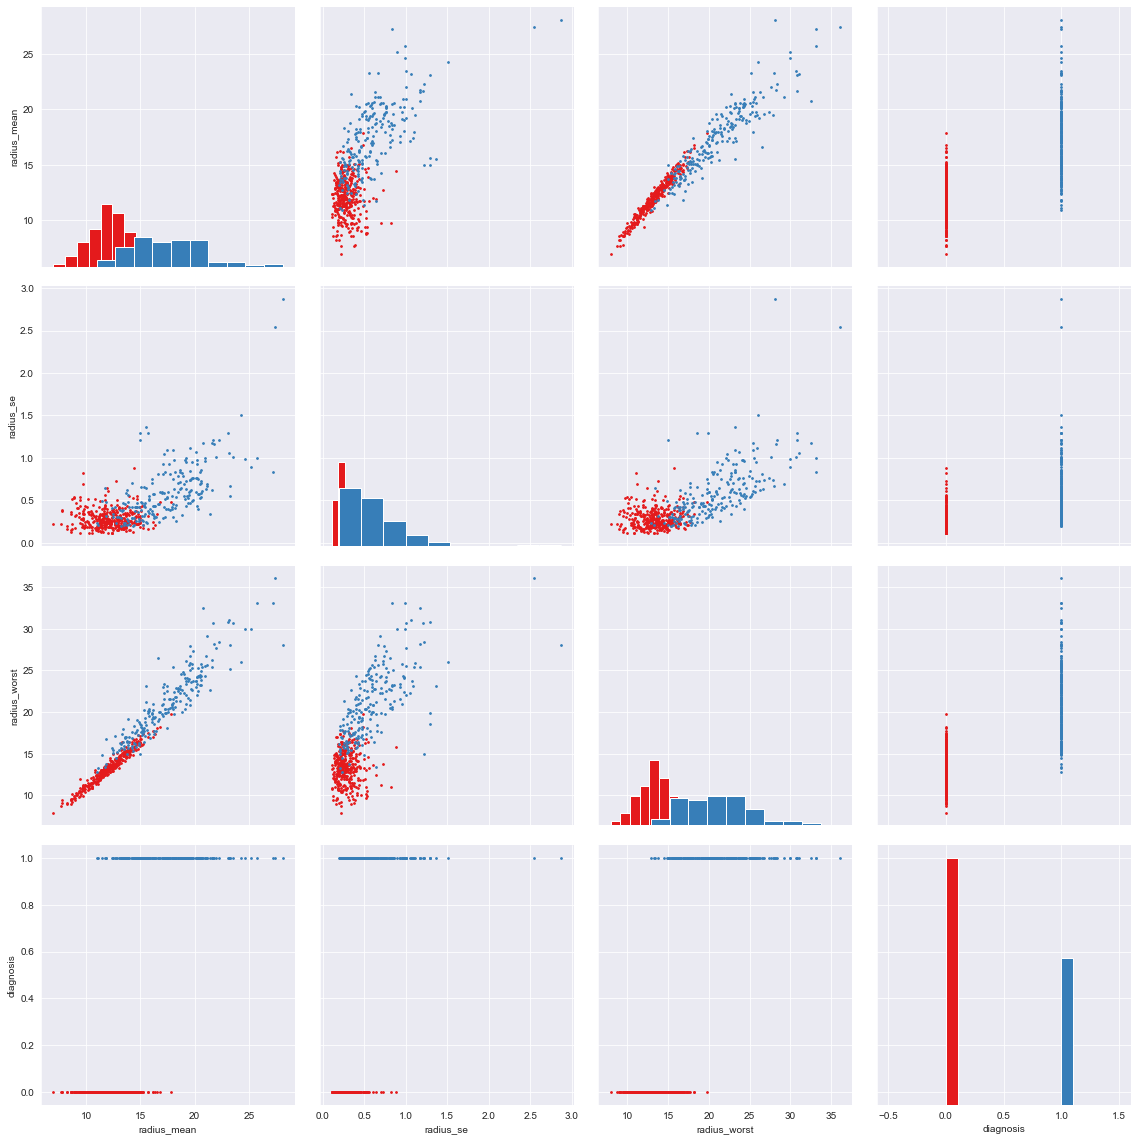

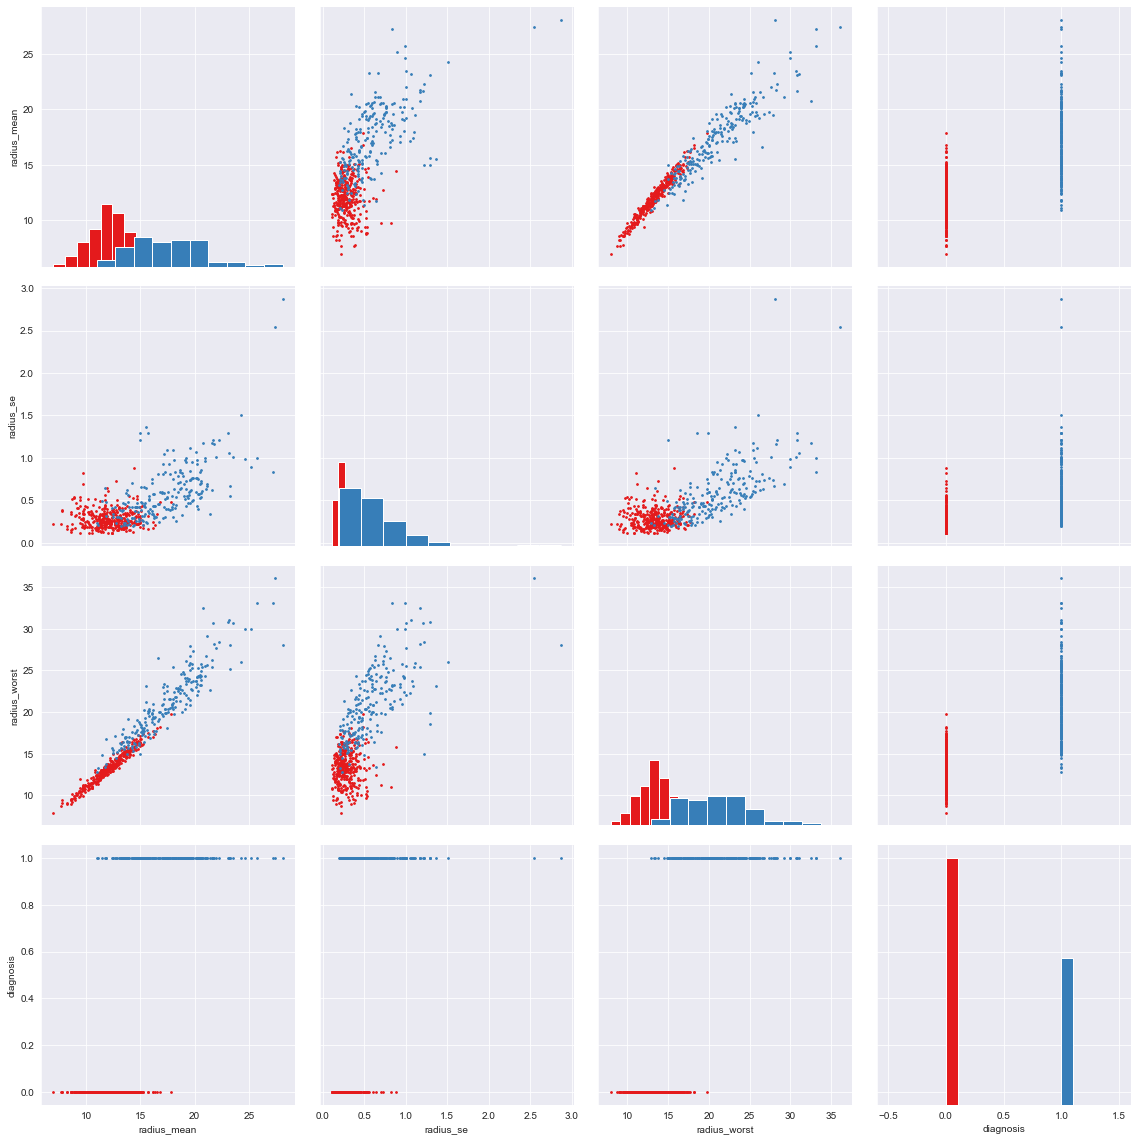

In [17]:
g = sns.PairGrid(radius,hue='diagnosis', palette="Set1",height=4)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


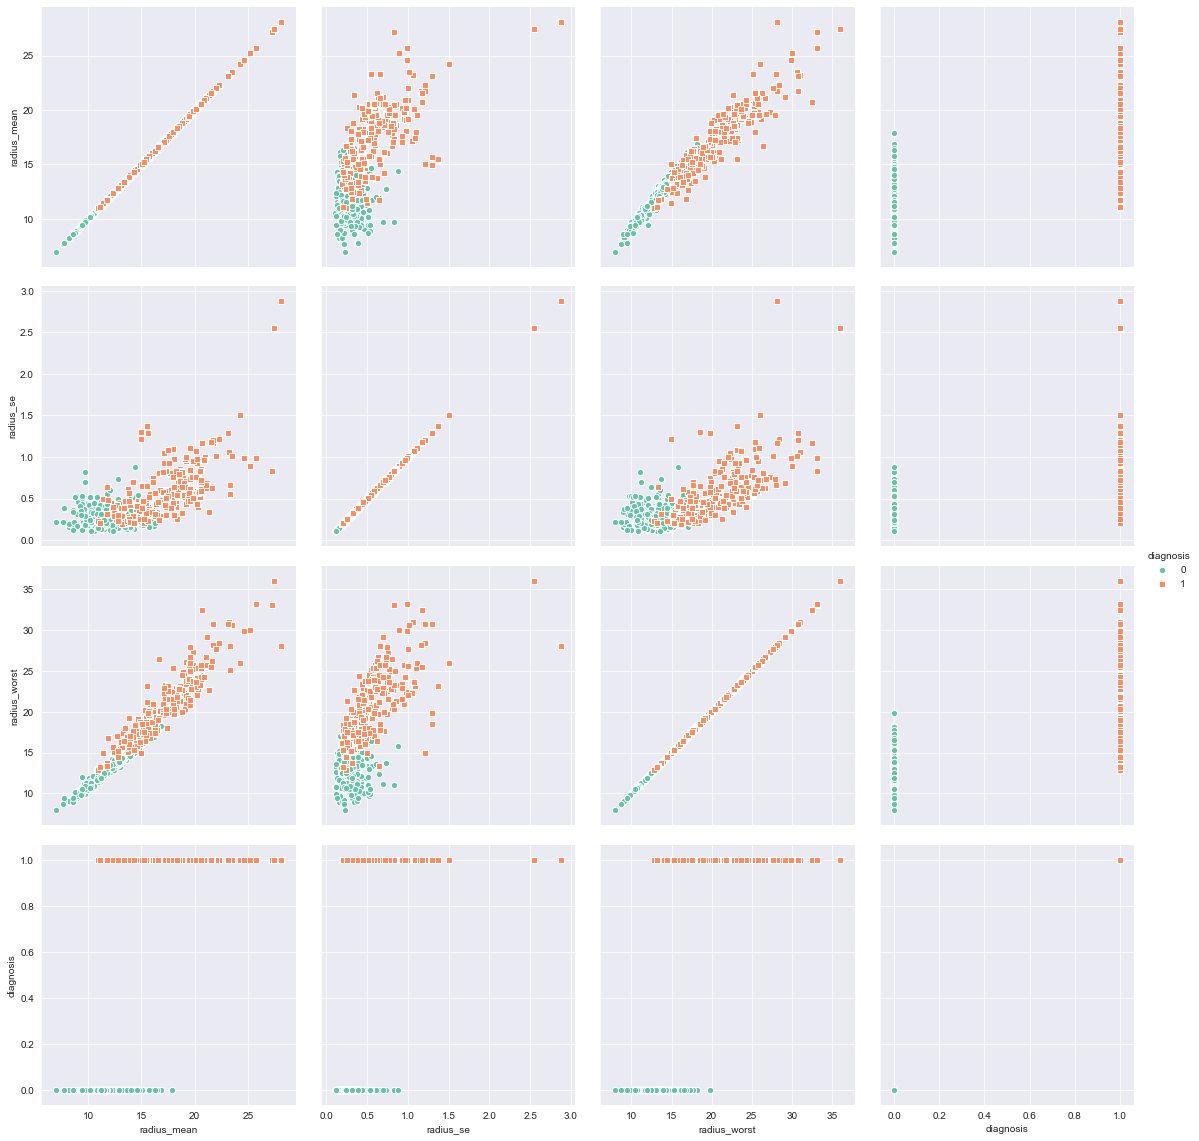

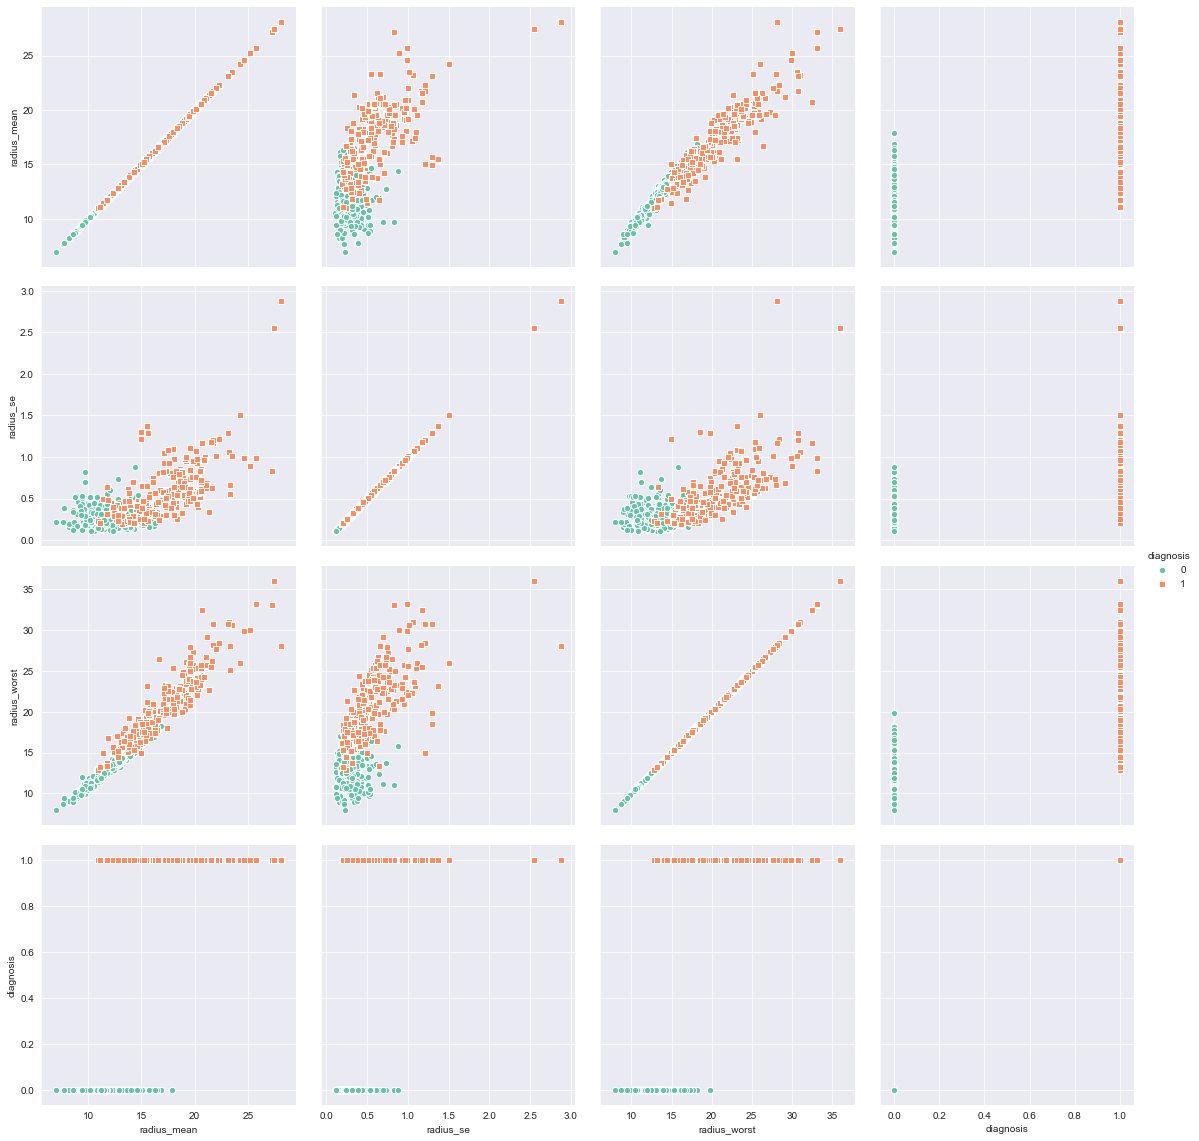

In [18]:
g = sns.PairGrid(radius, hue="diagnosis", palette="Set2",size=4,hue_kws={"marker": ["o", "s"]})
g = g.map(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.add_legend()

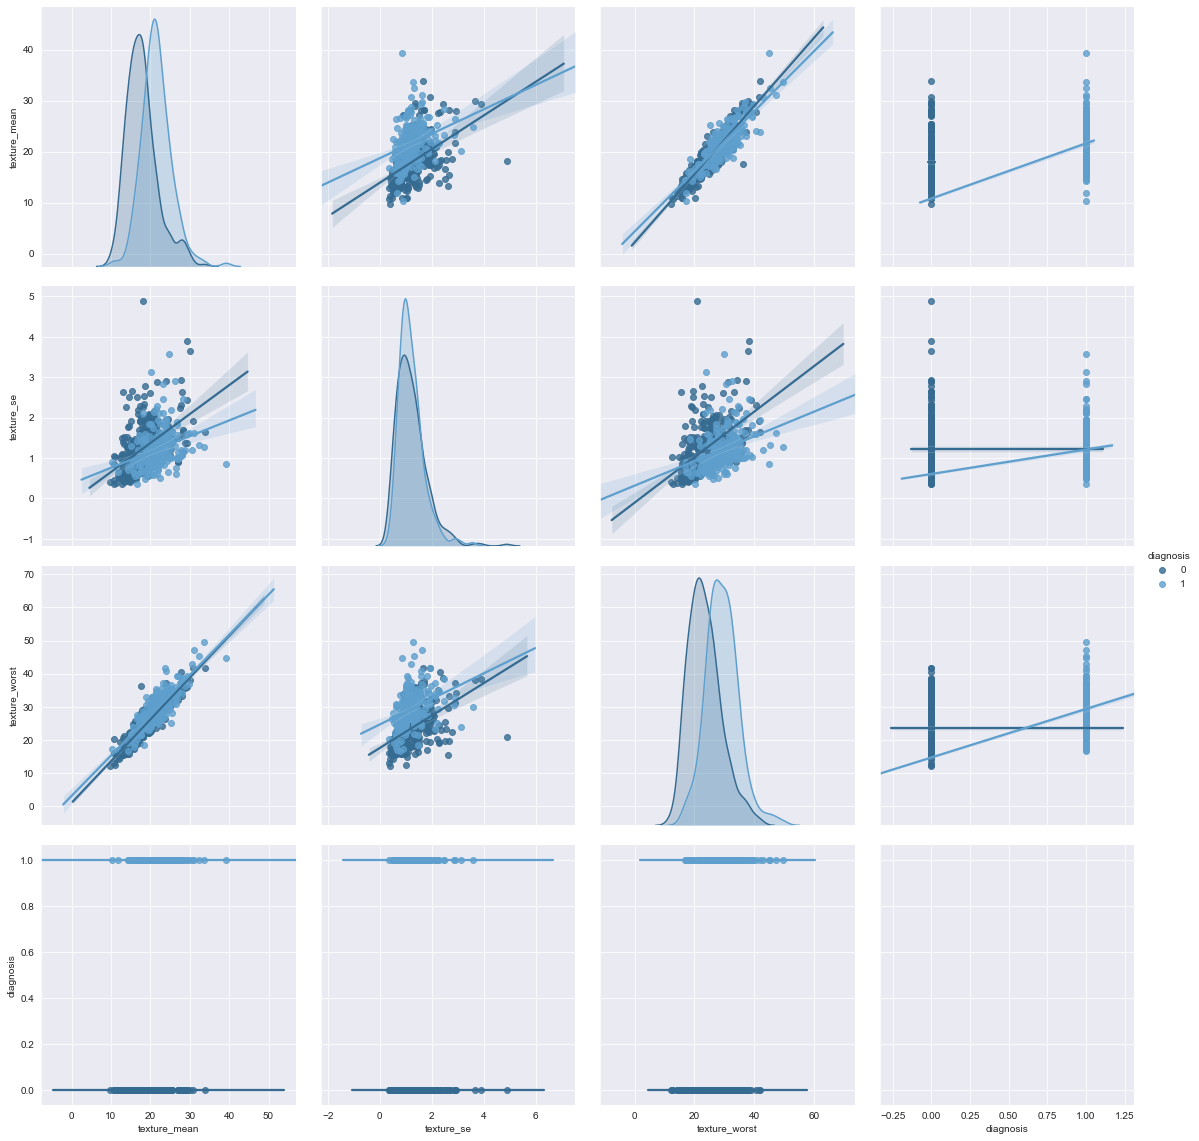

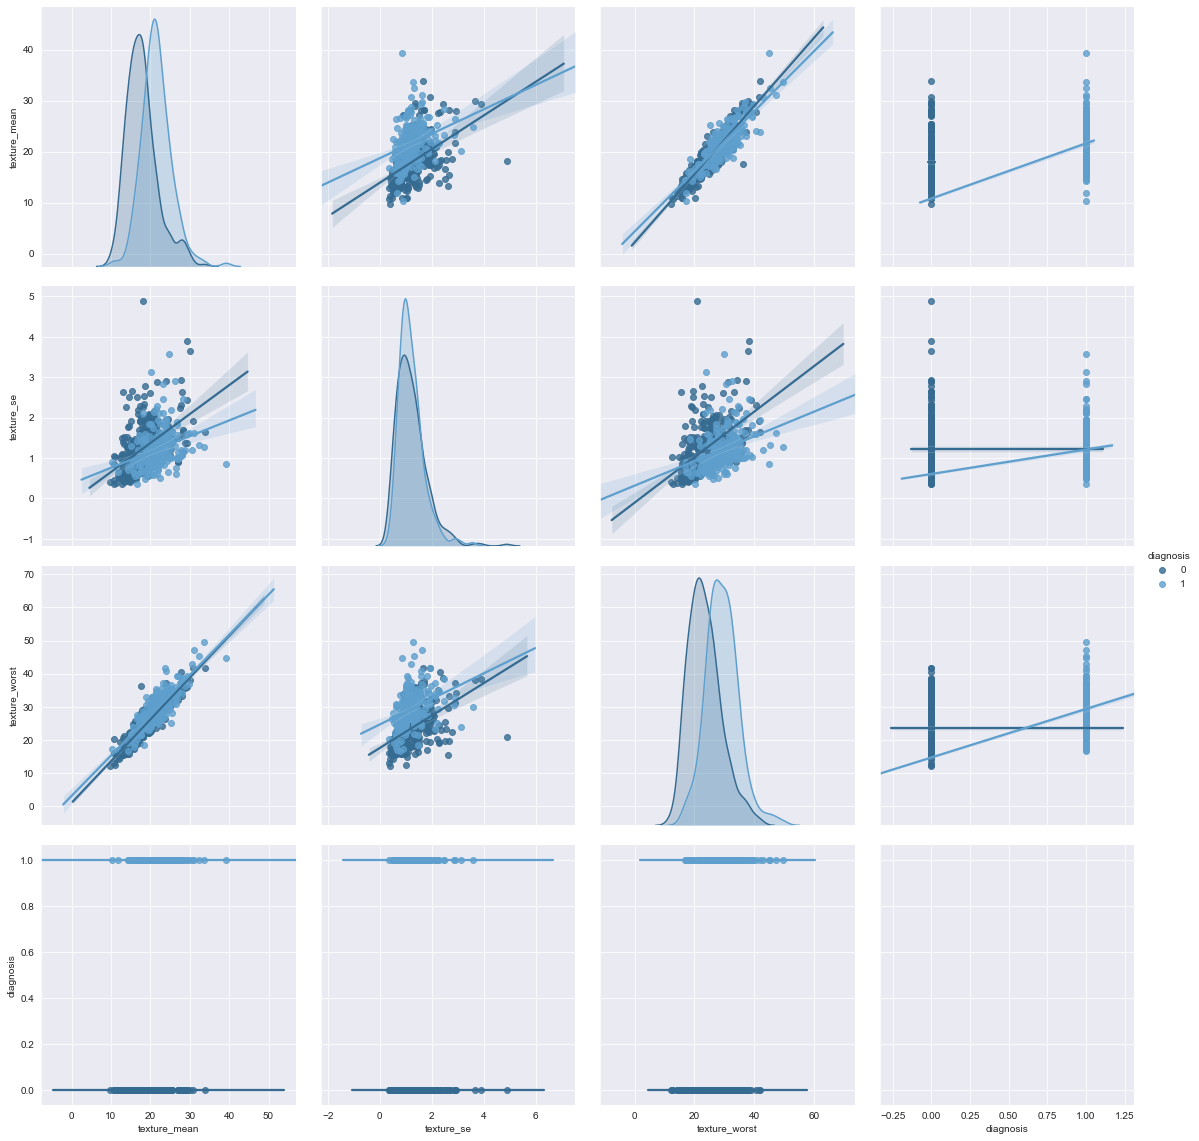

In [19]:
texture = dataset[['texture_mean','texture_se','texture_worst','diagnosis']]
sns.pairplot(texture, hue='diagnosis', palette="Blues_d",height=4, kind="reg")

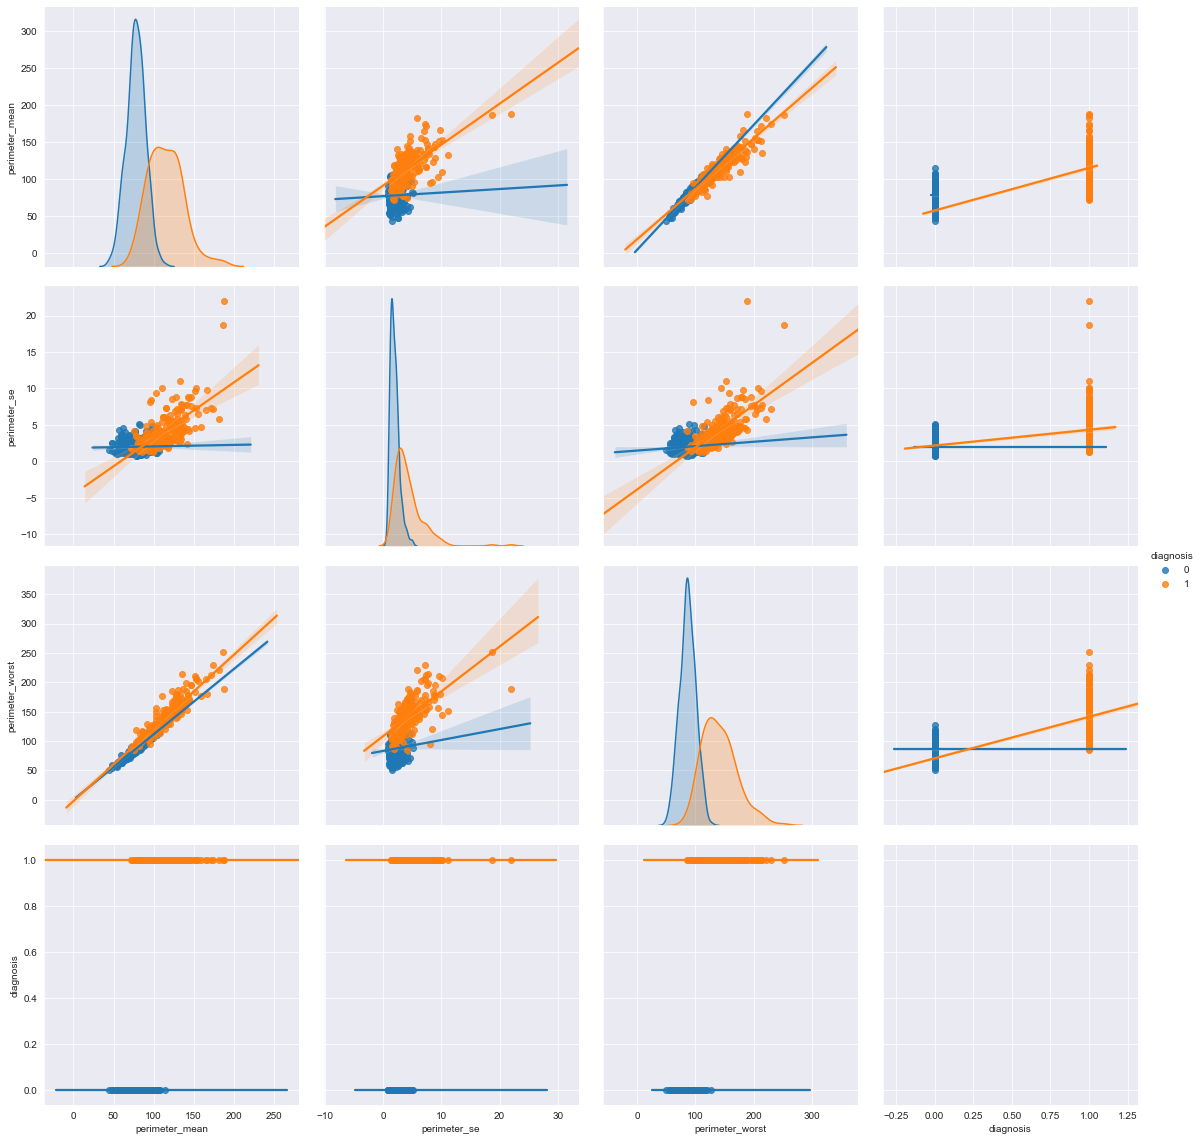

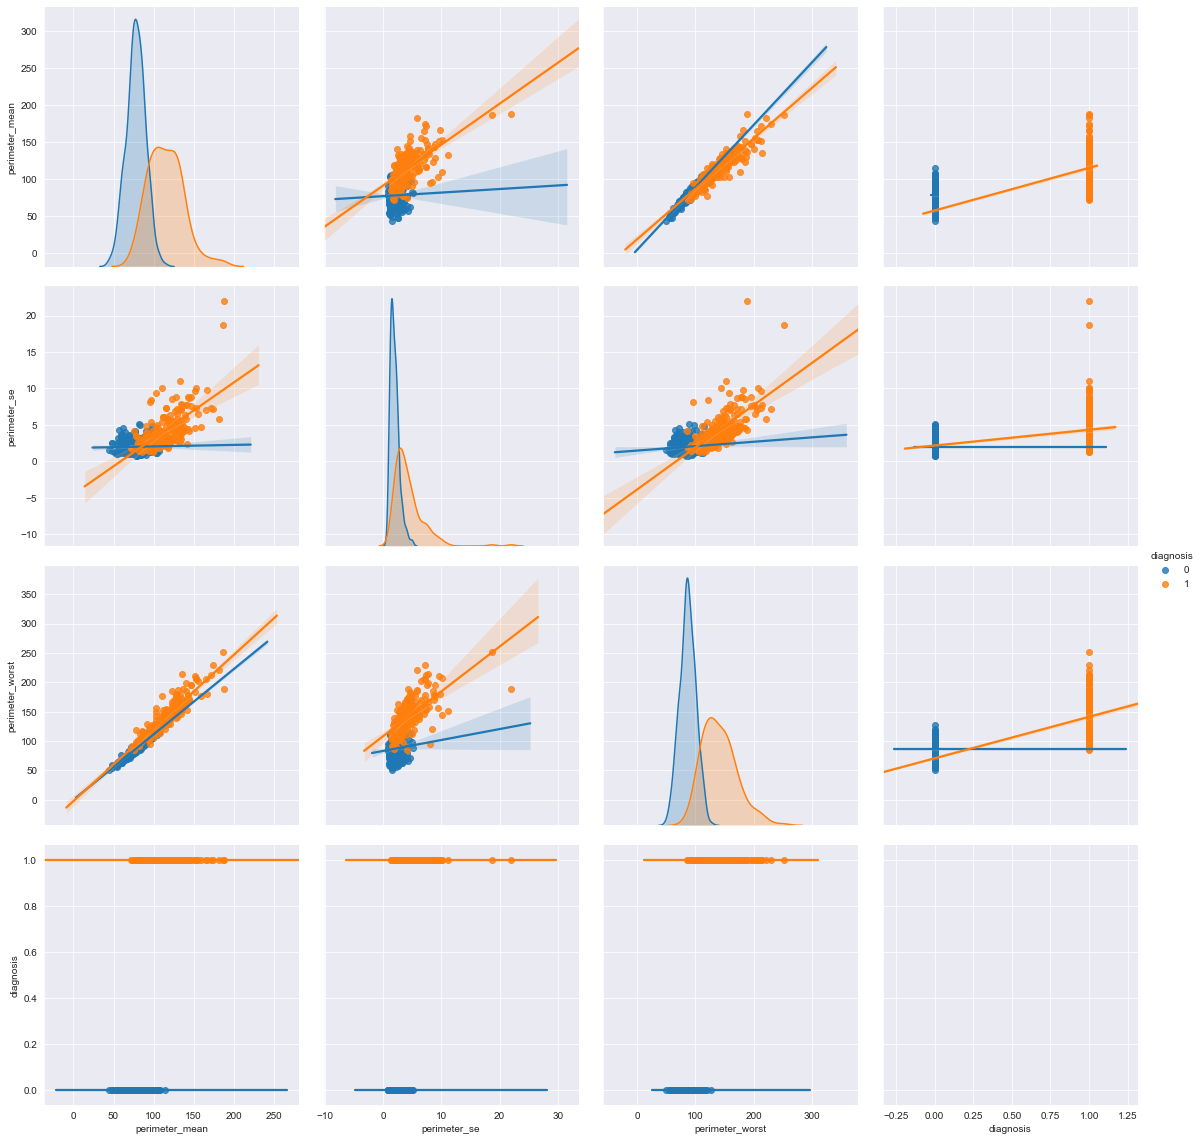

In [20]:
perimeter = dataset[['perimeter_mean','perimeter_se','perimeter_worst','diagnosis']]
sns.pairplot(perimeter, hue='diagnosis', height = 4, kind="reg")

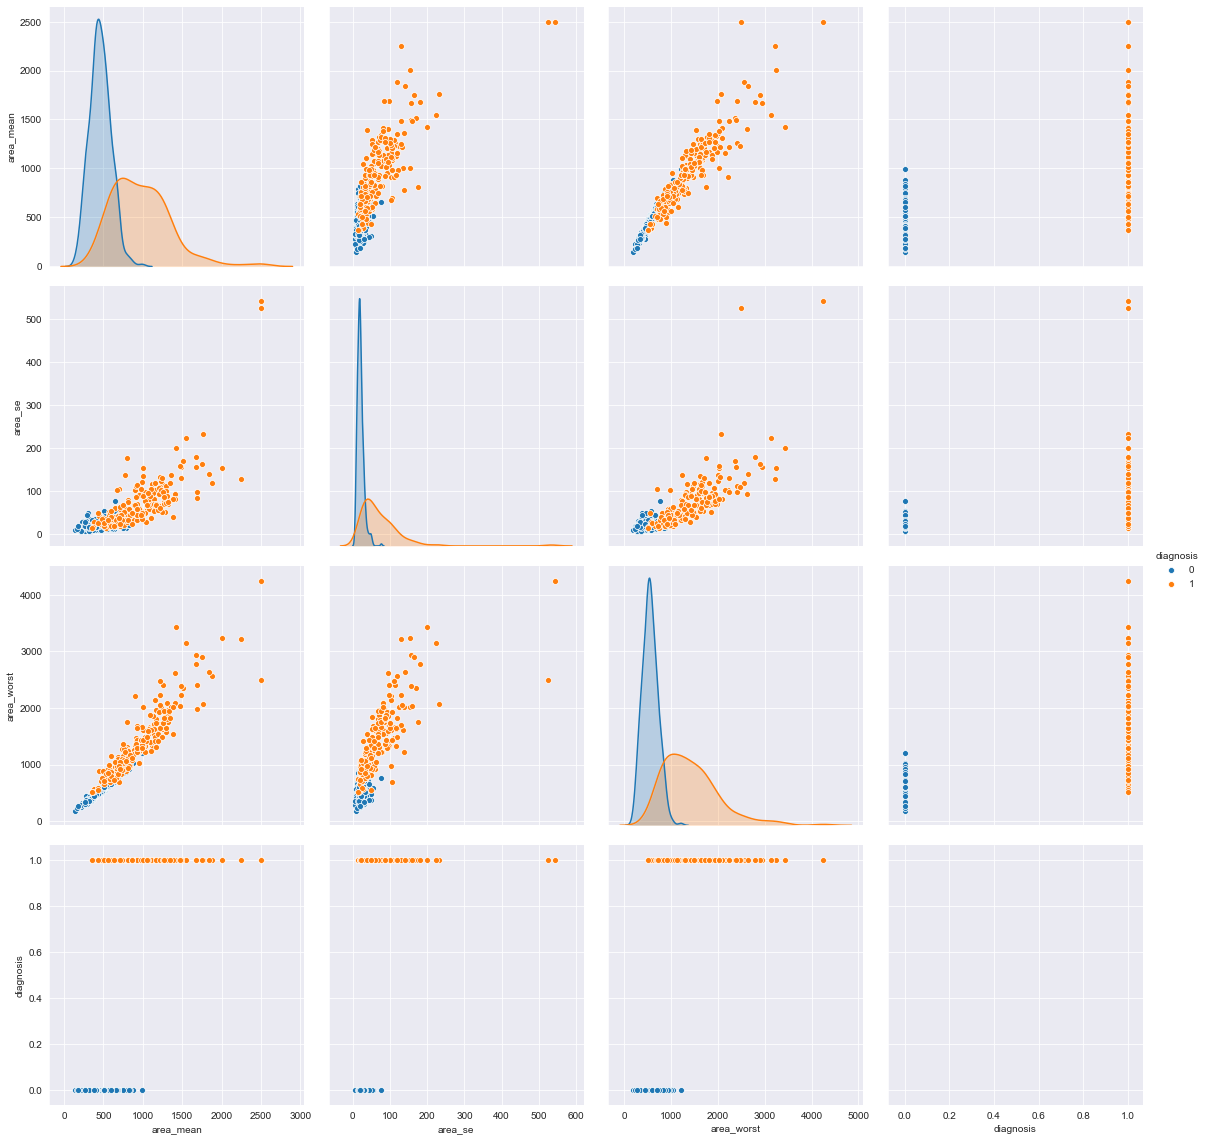

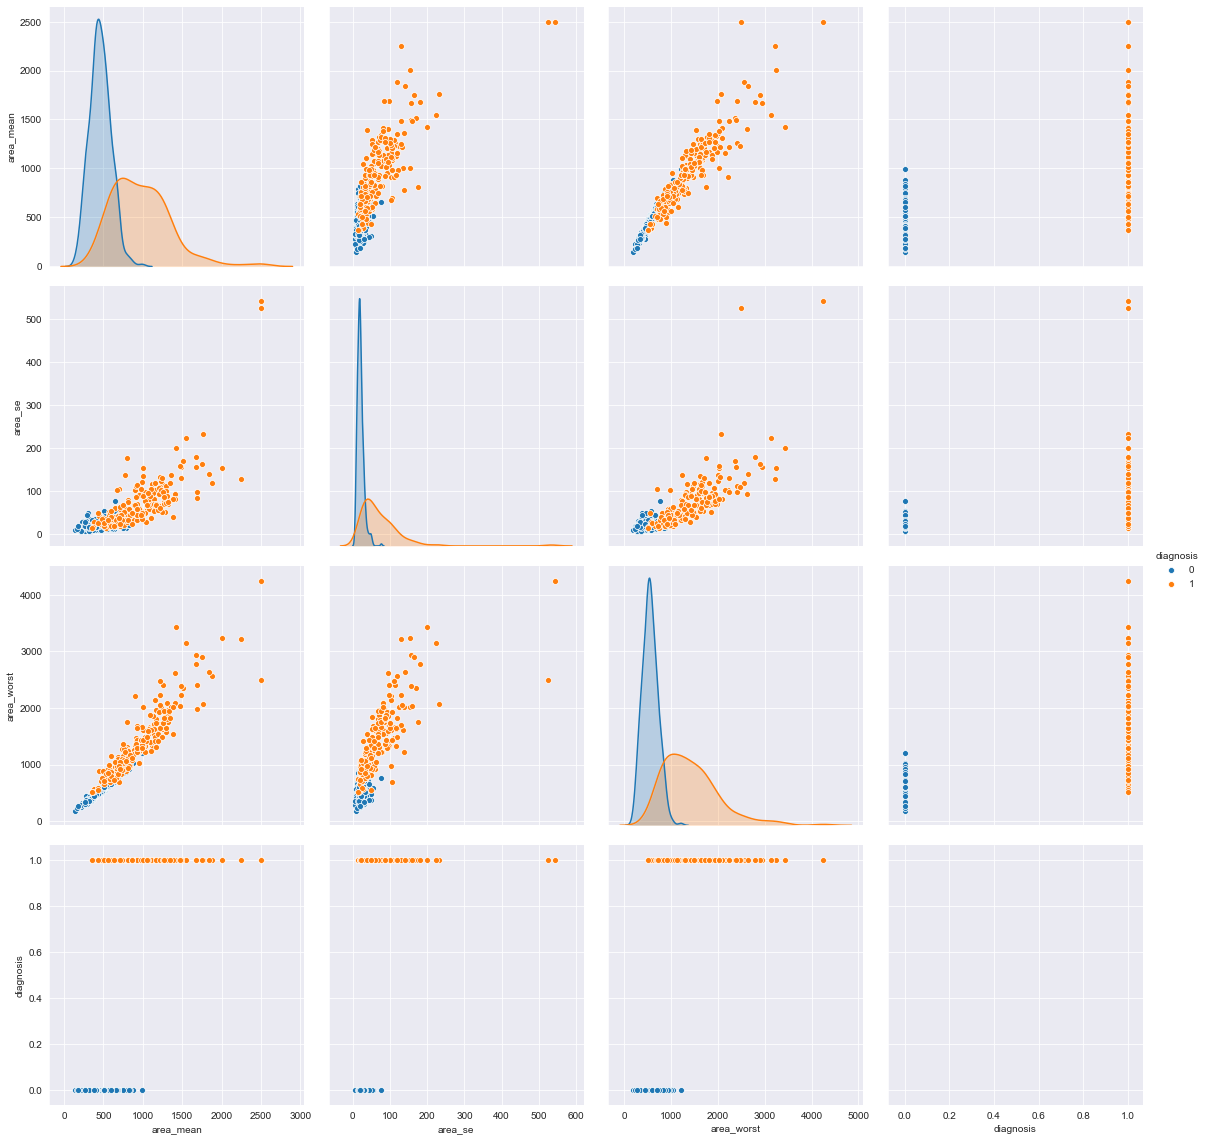

In [21]:
area = dataset[['area_mean','area_se','area_worst','diagnosis']]
sns.pairplot(area, hue='diagnosis', height =4)

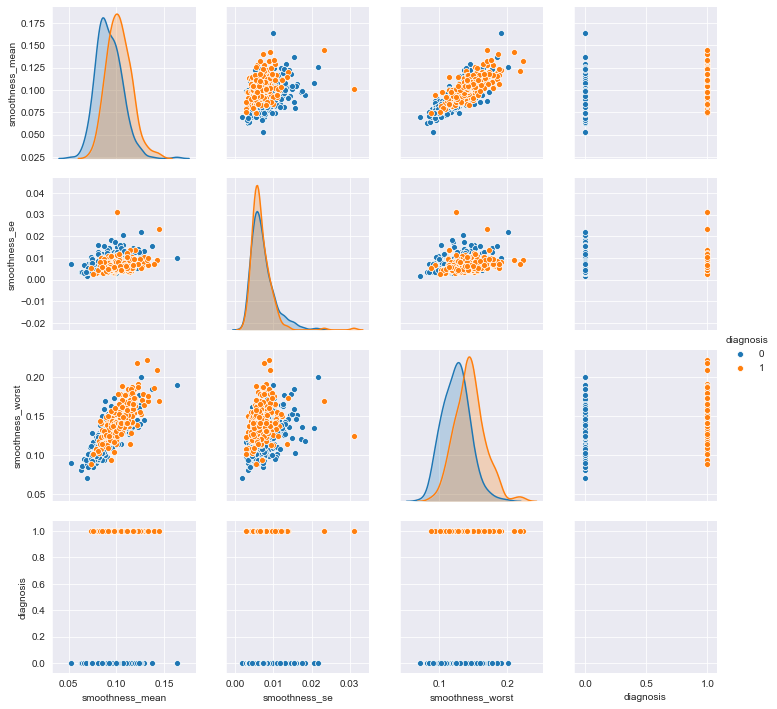

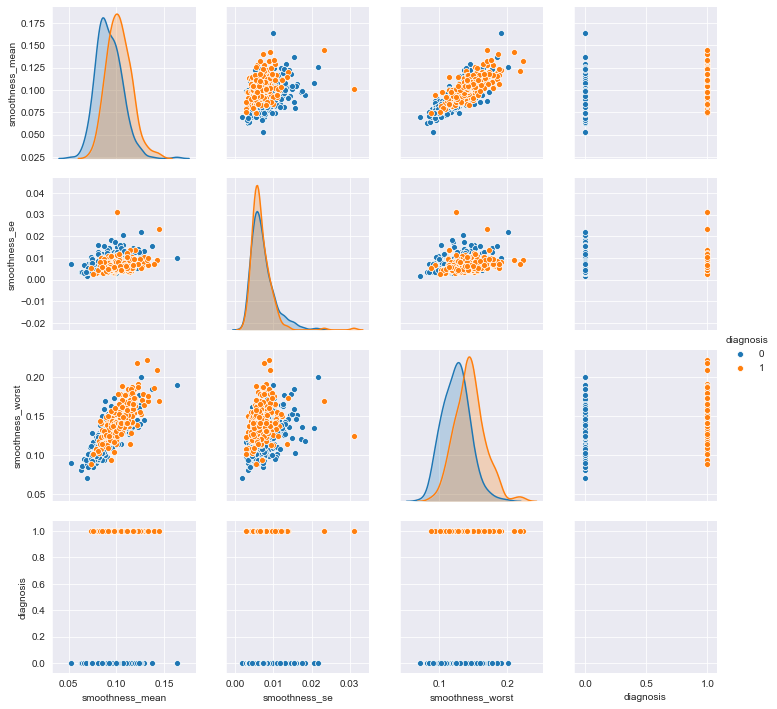

In [22]:
smoothness = dataset[['smoothness_mean','smoothness_se','smoothness_worst','diagnosis']]
sns.pairplot(smoothness, hue='diagnosis')

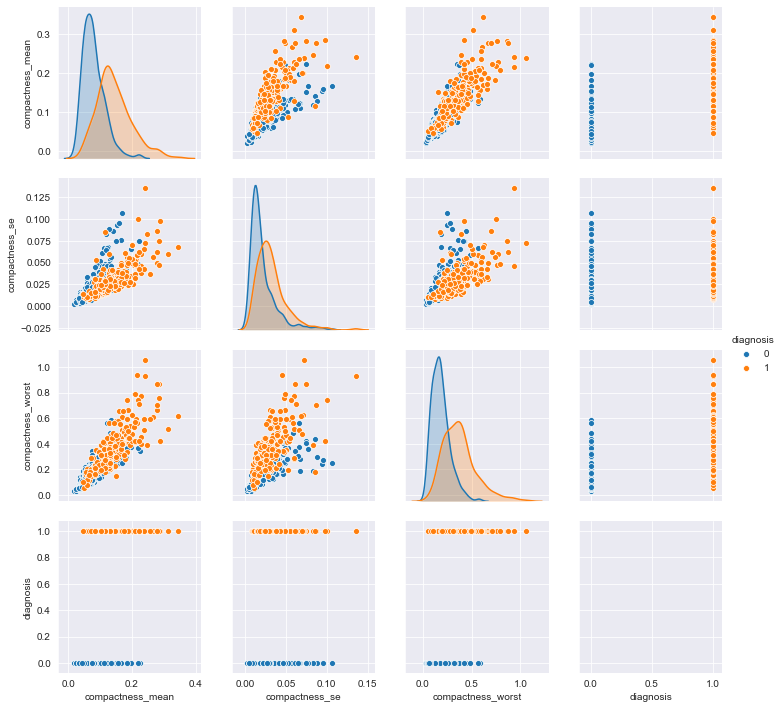

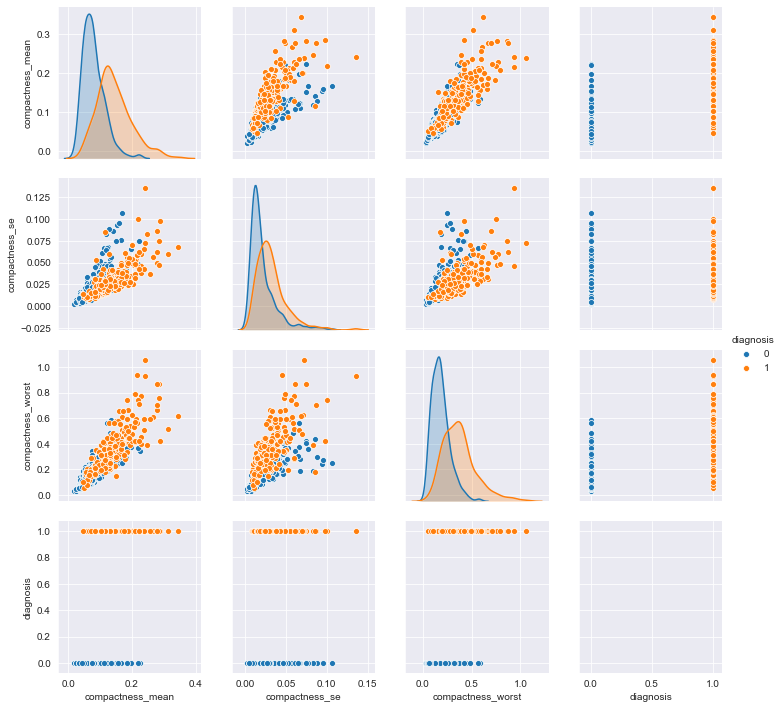

In [23]:
compactness = dataset[['compactness_mean','compactness_se','compactness_worst','diagnosis']]
sns.pairplot(compactness, hue='diagnosis')

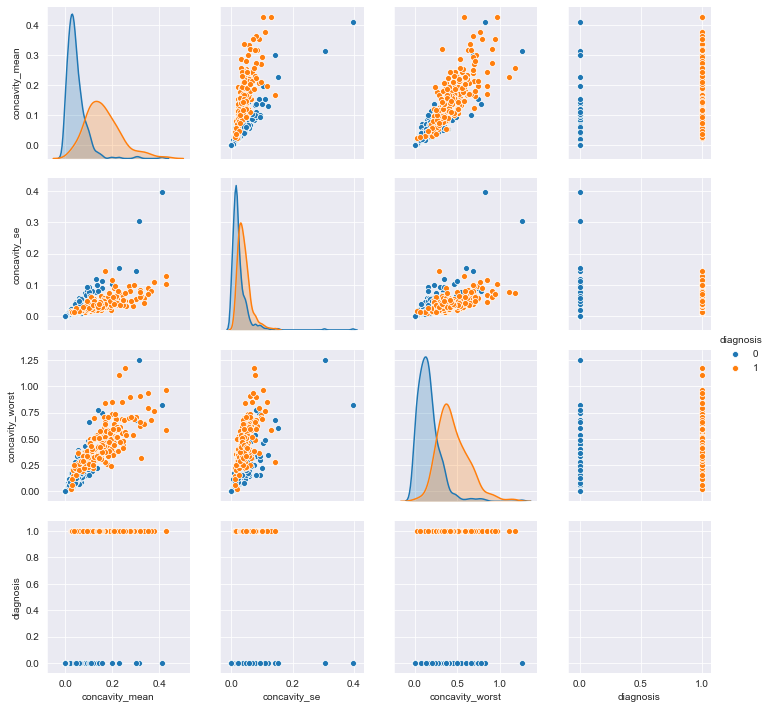

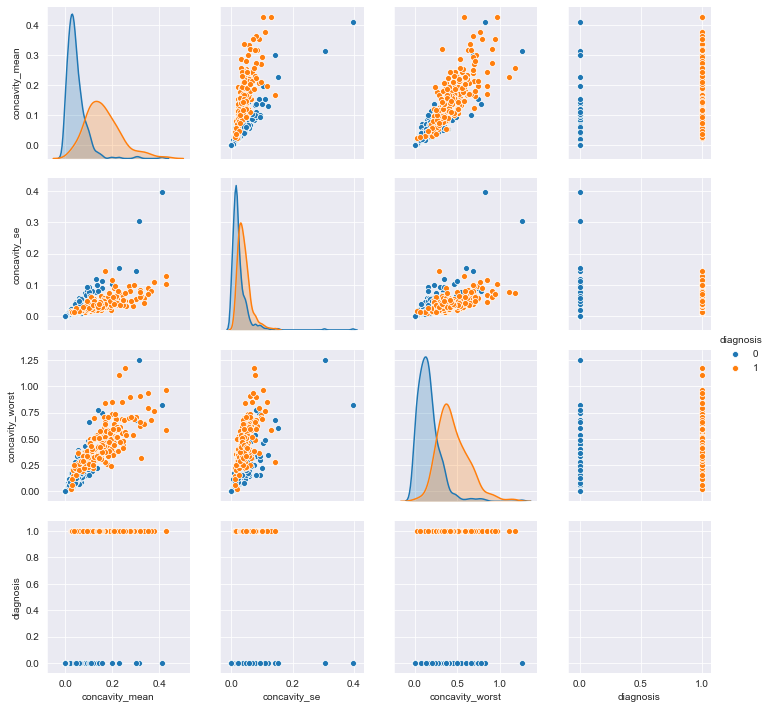

In [24]:
concavity = dataset[['concavity_mean','concavity_se','concavity_worst','diagnosis']]
sns.pairplot(concavity, hue='diagnosis')

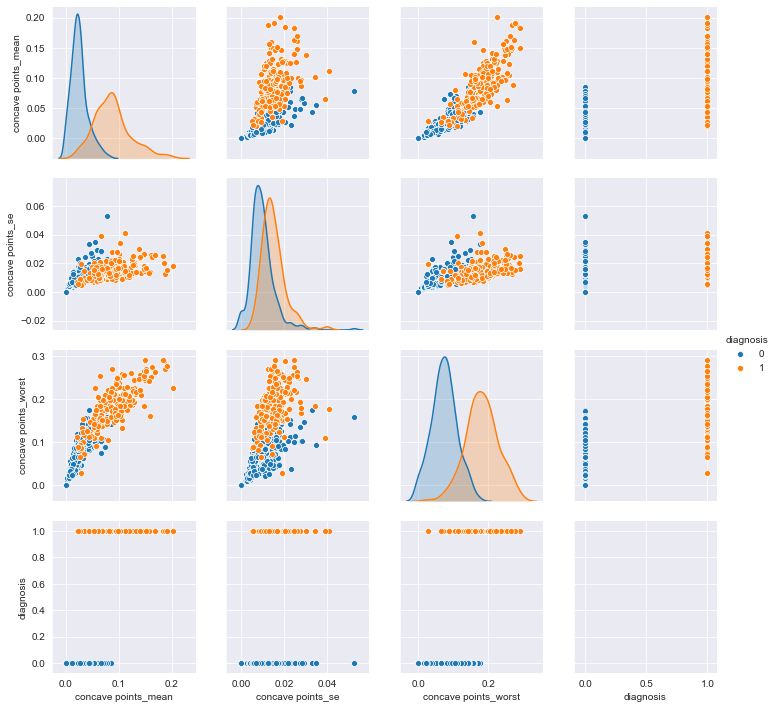

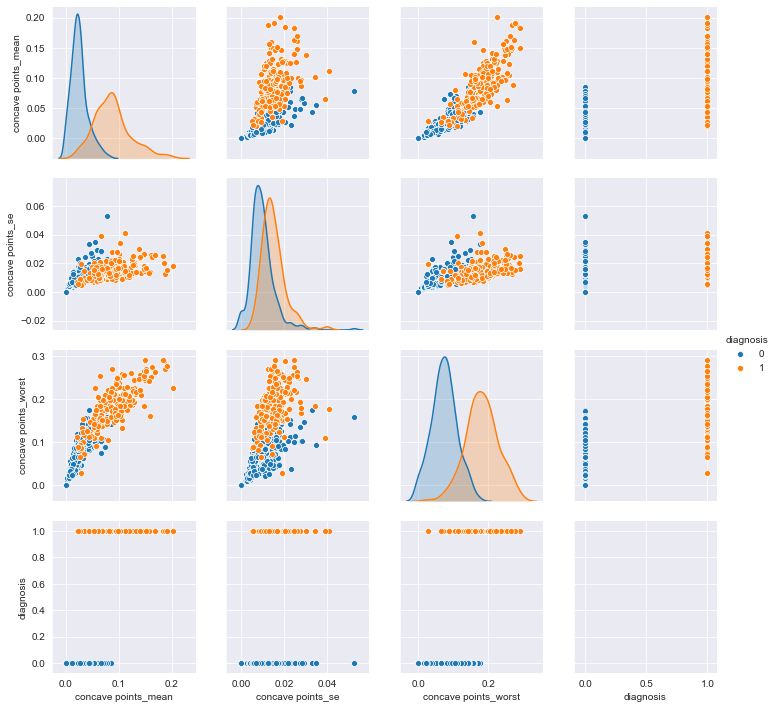

In [25]:
concave_points = dataset[['concave points_mean','concave points_se','concave points_worst','diagnosis']]
sns.pairplot(concave_points, hue='diagnosis')

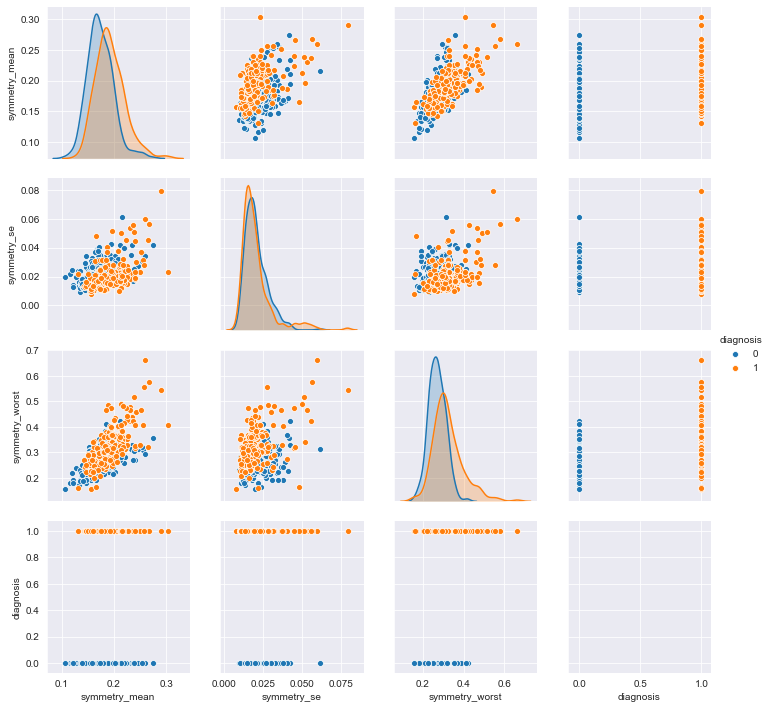

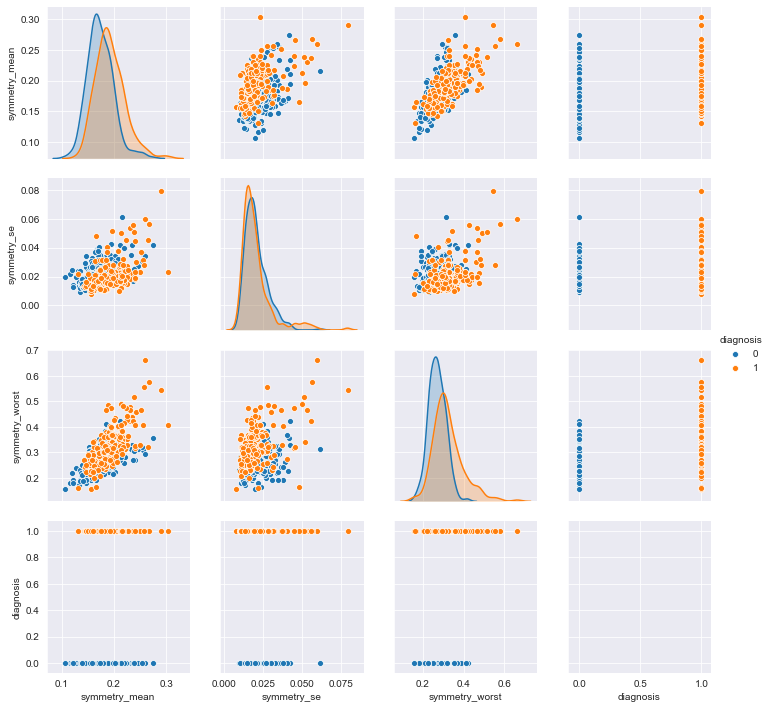

In [26]:
symmetry = dataset[['symmetry_mean','symmetry_se','symmetry_worst','diagnosis']]
sns.pairplot(symmetry, hue='diagnosis')

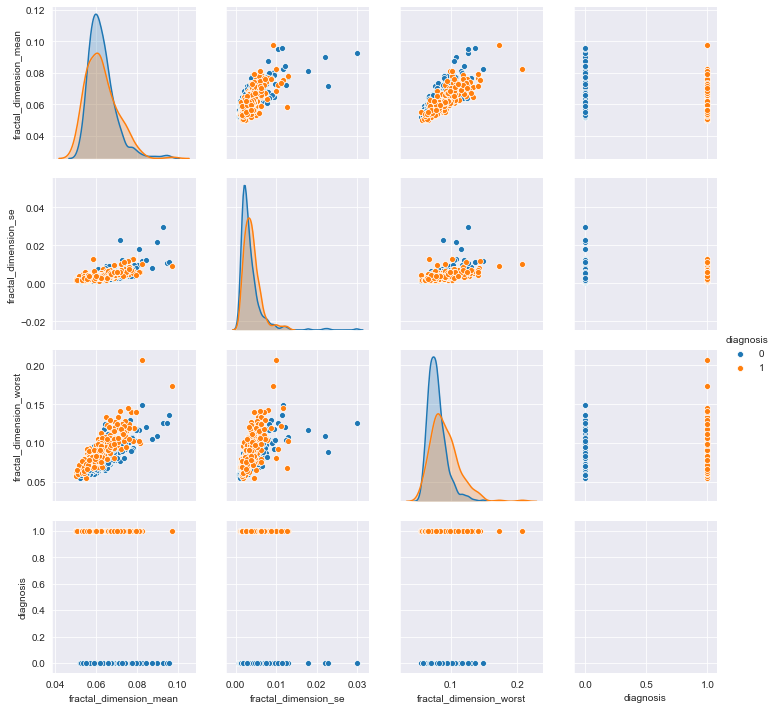

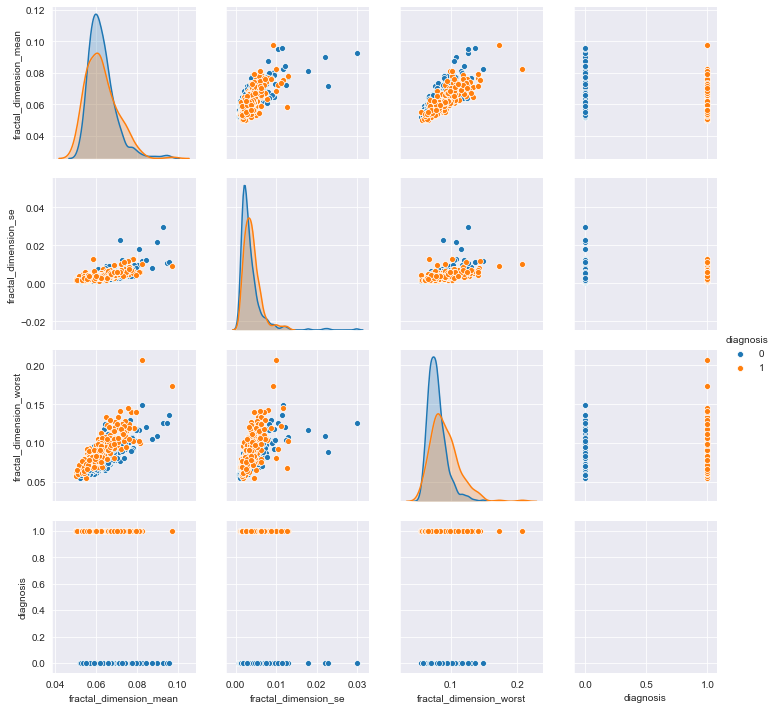

In [27]:
fractal_dimension = dataset[['fractal_dimension_mean','fractal_dimension_se','fractal_dimension_worst','diagnosis']]
sns.pairplot(fractal_dimension, hue='diagnosis')

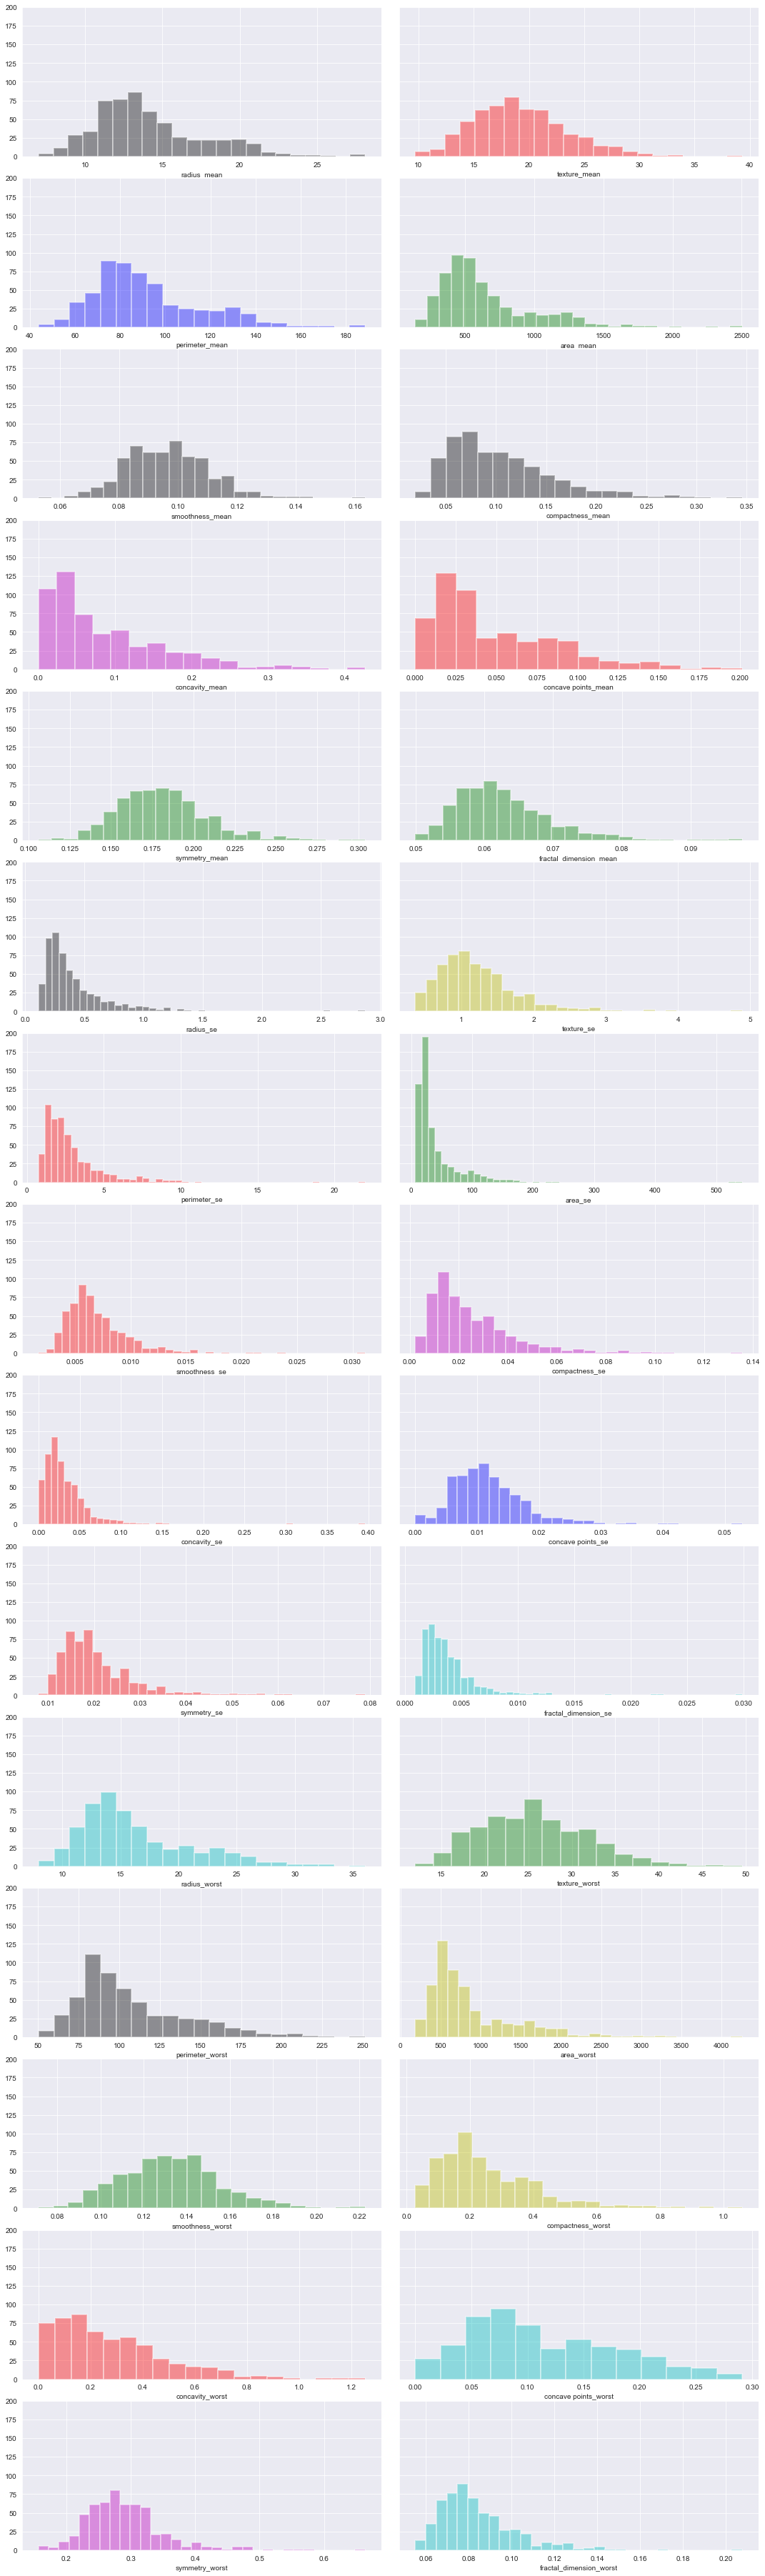

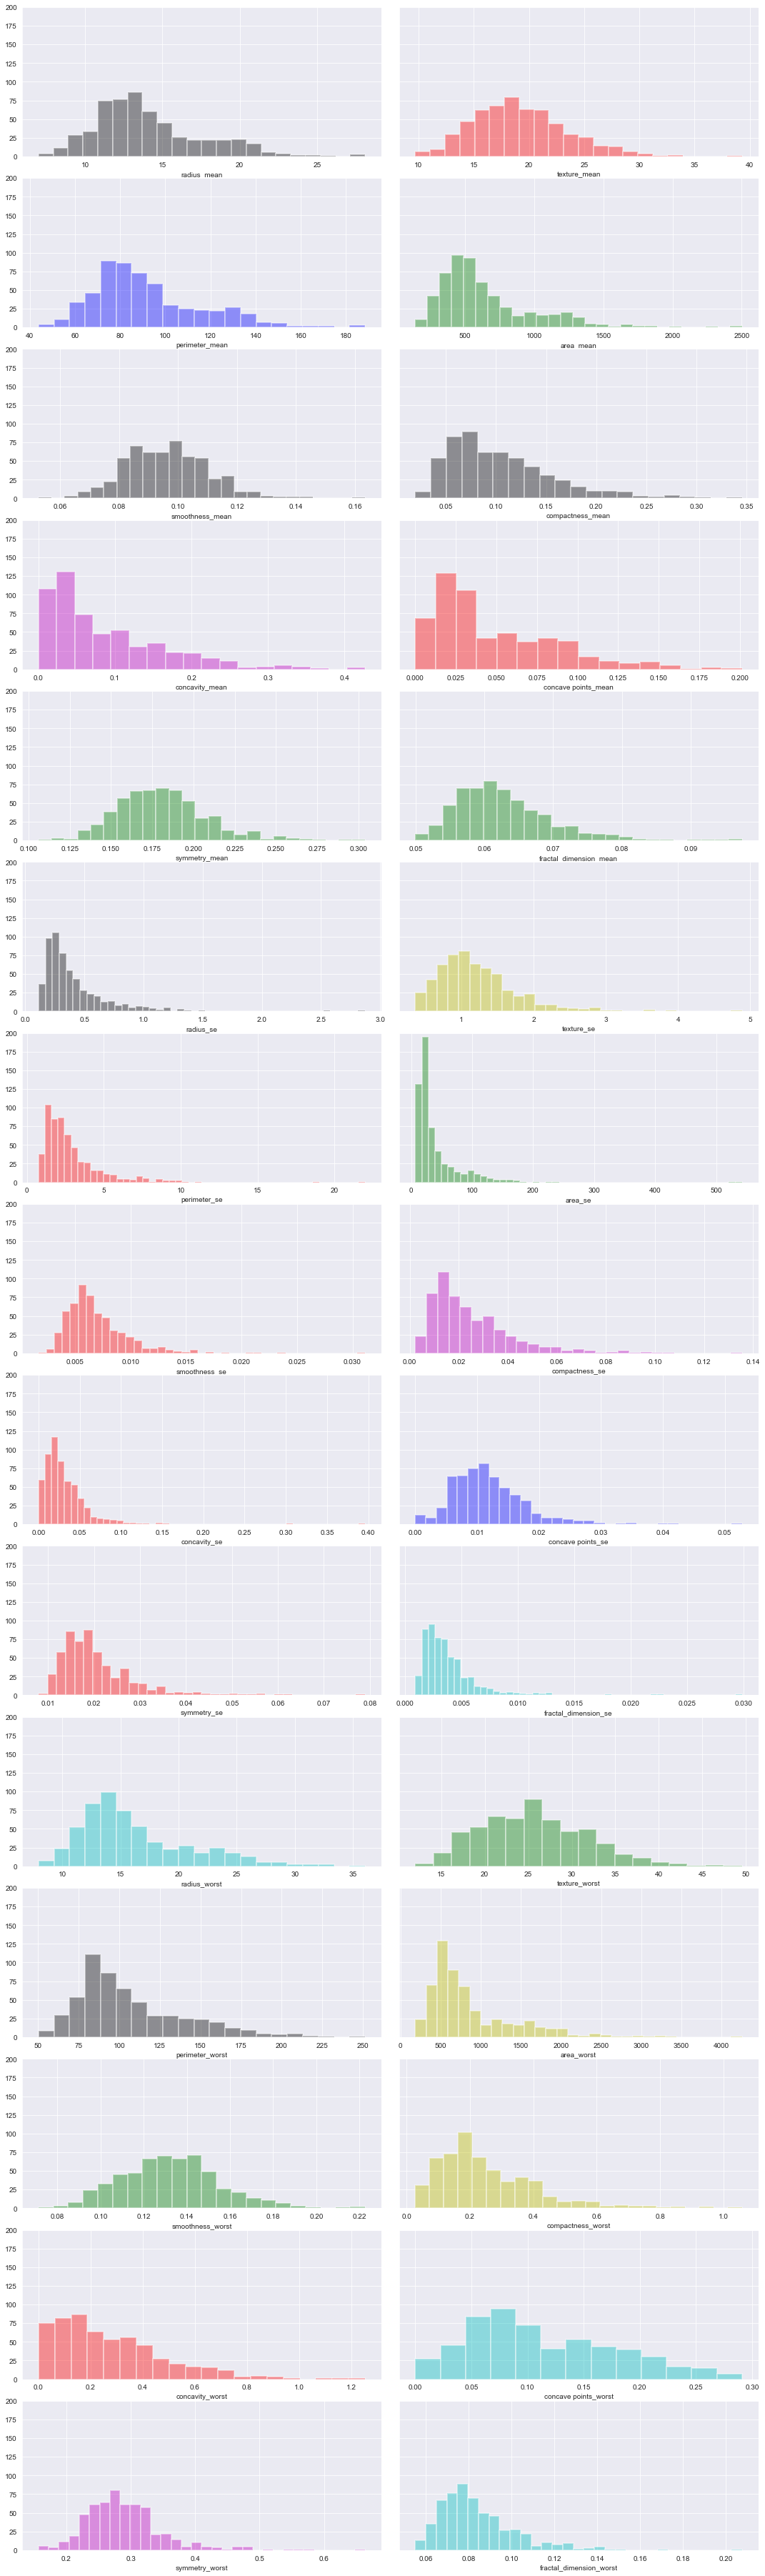

In [28]:
end = dataset['diagnosis']
dataset.drop(labels=['diagnosis'], axis=1,inplace = True)
dataset.insert(30, 'diagnosis', end)
dataset.head()

def categorical_to_numeric_diagnosis(x):
    if x=='M':
        return 1
    if x=='B':
        return 0

dataset['diagnosis']= dataset['diagnosis'].apply(categorical_to_numeric_diagnosis)
dataset["diagnosis"].value_counts()


colors = np.array('b g r c m y k'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =15,ncols=2, sharey=True,figsize = (15,50))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(dataset.columns[:-1])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(dataset[dataset.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)

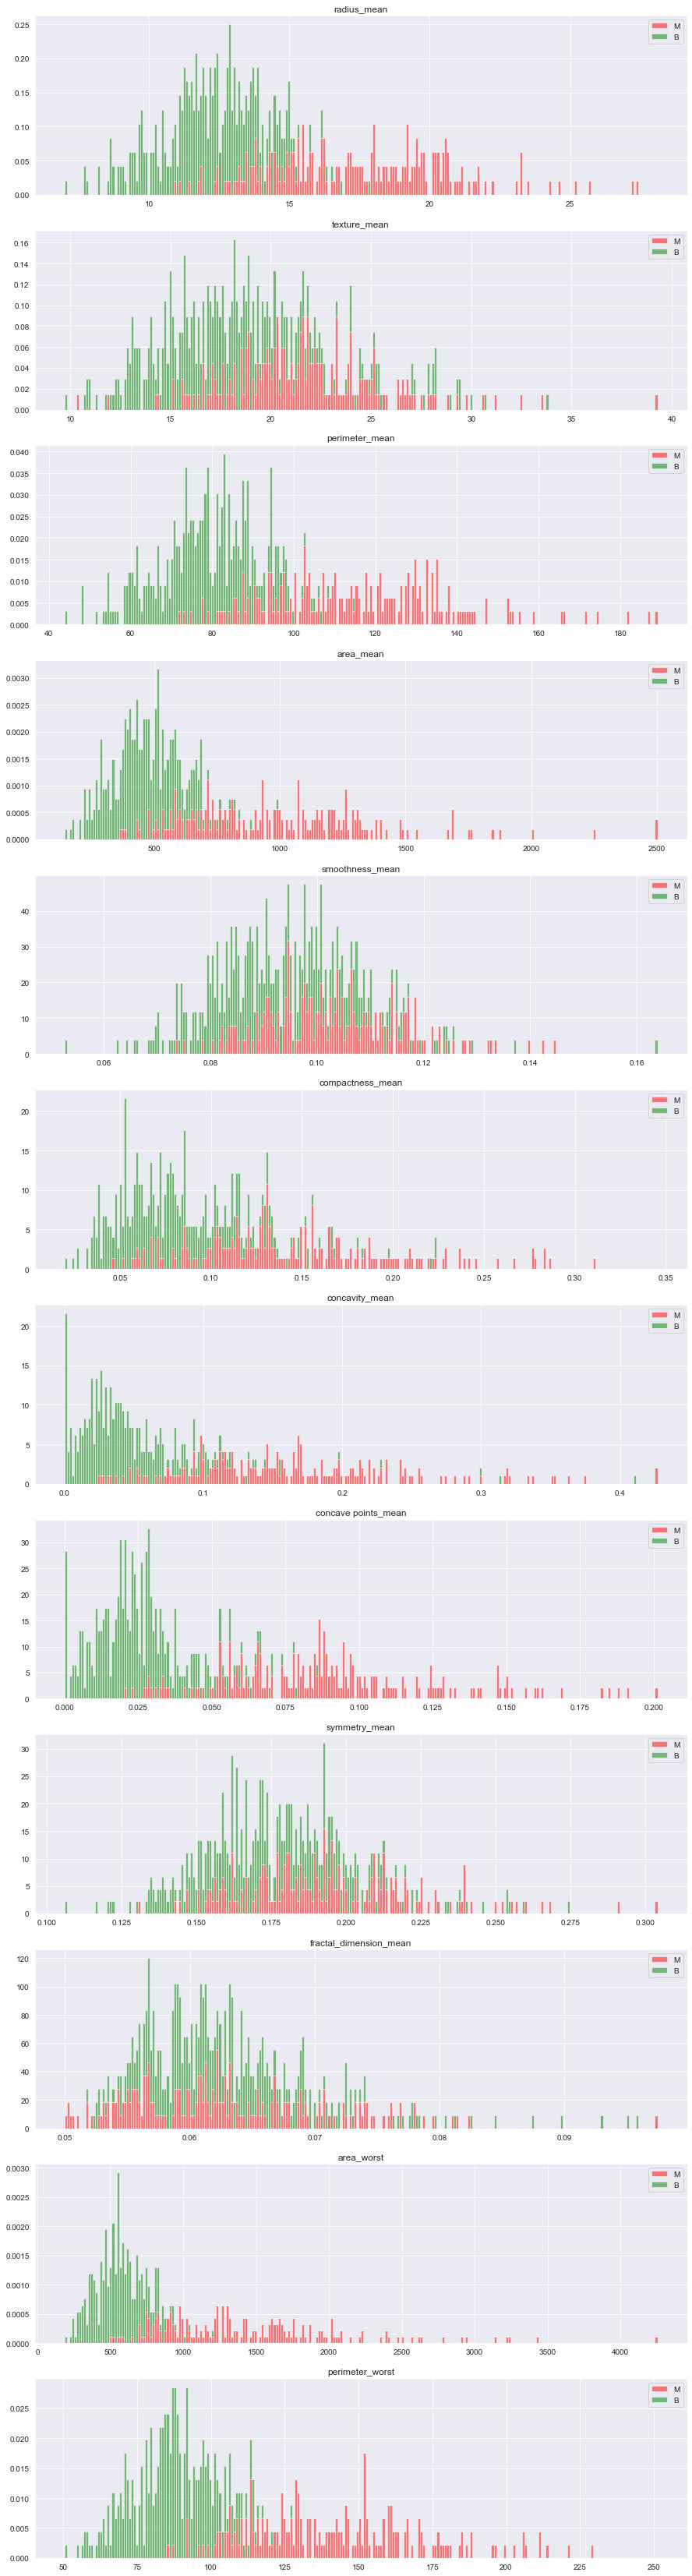

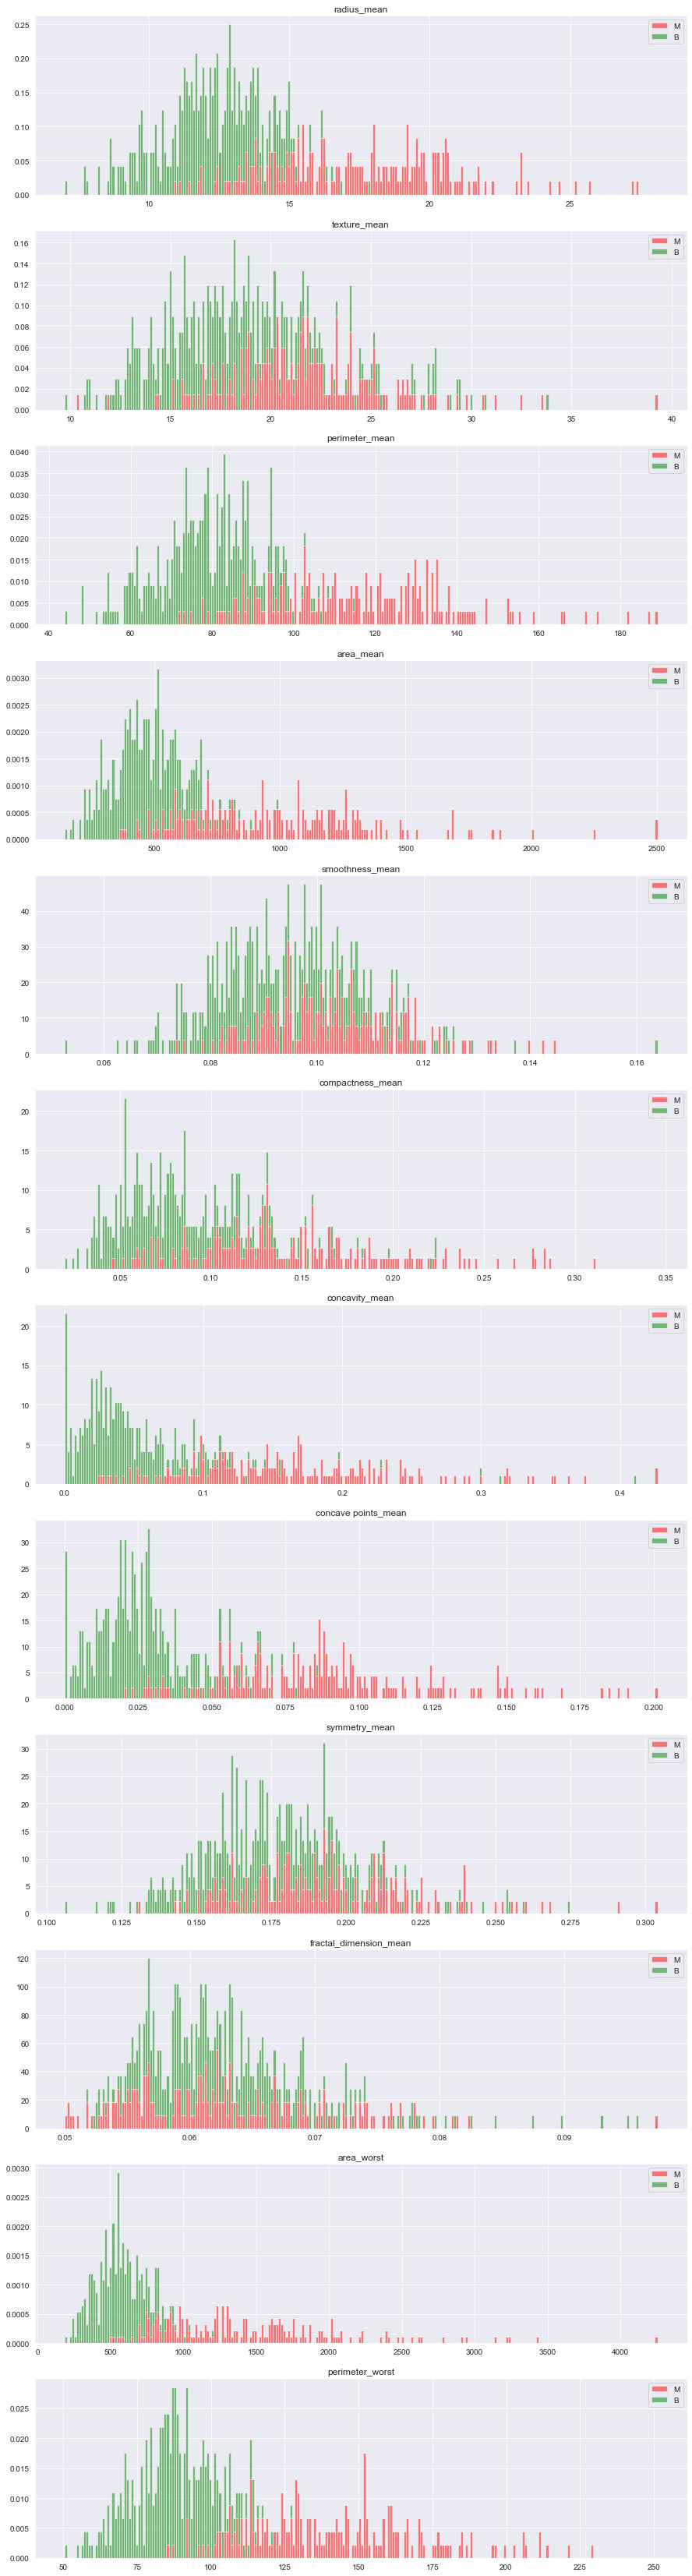

In [29]:
#The features looks like they are broken into three main categories, value means, standard deivations, and 'worst'. We can check to see if there are any correlations between these subsets of features
# Separate out malignant and benign data for graphing
malignant = dataset[dataset['diagnosis'] ==1]
benign = dataset[dataset['diagnosis'] ==0]

features_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'] + ['area_worst'] + ['perimeter_worst']
fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(15,60))
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(dataset[features_mean[idx]]) - min(dataset[features_mean[idx]]))/250
    ax.hist([dataMalignant[features_mean[idx]],dataBenign[features_mean[idx]]], bins=np.arange(min(dataset[features_mean[idx]]), max(dataset[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.show()
